In [2]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity
import shutil


def split_time(data_name):
    
    time = data_name.split(".")[0]       
    time = time.split("_t")
    day = time[0]
    hour = int((time[1])[:2])
    minute = int((time[1])[2:4])
    second = int((time[1])[4:6])
    
    return hour, minute, second

def to_second(h,m,s):
    
    return 3600*h + 60*m + s


def get_image_dev(image):
    
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    arr = np.array(img)
    arr2 = arr.flatten()
    stdev = np.std(arr2, ddof=1)
    
    return stdev


directory_name = r"D:\Dementia_Data_Preprocessing\testing_data\test_exist\mask"
directory_name_2 = r"D:\Dementia_Data_Preprocessing\testing_data\test_exist\4"
similarity_threshold = 0.6
time_threshold = 4
stdev_threshold = 10

aaa = []
bbb = []

list_A = []
list_B = []
num = 0
count = 0
moving_level_list = []
moving_time_list = []
hour_count = 0
hour_count_list = []
dic = {}
for filename in os.listdir(directory_name):
    num = num+1

    
    # motion detect start #########################################################
    
    
    if (num % 2) == 0:
        list_B = []      
        list_B.append(filename)
       
    else:
        list_A = [] 
        list_A.append(filename)   
    
    if len(list_A) != 0 and len(list_B) != 0:
        
        #print(list_A,list_B)
        h1,m1,s1 = split_time(list_A[0])

        h2,m2,s2 = split_time(list_B[0])
        
        if h1 == h2:
            dic[h2] = hour_count 
            
        elif h1<h2:
            dic[h1] = hour_count
            hour_count = 0
            
        else:
            dic[h2] = hour_count
            hour_count = 0
            
        # detect continous frame  ###################################################
                
#         if abs(to_second(h1,m1,s1) - to_second(h2,m2,s2)) > time_threshold:
#             print(f"{list_A[0],list_B[0]} are not continuous frame, skip")
#             continue
            
        # detect lying image  #######################################################
        
        a_2 = cv2.imread(directory_name_2 + "\\" + list_A[0])
        b_2 = cv2.imread(directory_name_2 + "\\" + list_B[0])
        
        dev_a = get_image_dev(a_2)
        dev_b = get_image_dev(b_2)
        
        if dev_a < stdev_threshold and dev_b < stdev_threshold:
            print(f"{list_A[0],list_B[0]} both are not lying image, skip")
            continue
                      
        # identify similarity  ######################################################
        
        a = cv2.imread(directory_name + "\\" + list_A[0])
        b = cv2.imread(directory_name + "\\" + list_B[0])
        
        (score, diff) = structural_similarity(a,b, full=True,multichannel=True)
        #score = round(score,2)
        
        
        if score < similarity_threshold:
                    
            aaa.append(score)
            bbb.append(count)
            c = (list_A[0],list_B[0],f"SSIM: {score}")
            print(c)
            
            count+=1                 
            hour_count+=1
           
            #shutil.copyfile("D:/Dementia_Data_Preprocessing/testing_data/4" + "/" + list_A[0], "D:/motion_detect"+"/"+list_A[0])
            #shutil.copyfile("D:/Dementia_Data_Preprocessing/testing_data/4" + "/" + list_B[0], "D:/motion_detect"+"/"+list_B[0])            
        elif score < 0.65 and score >= similarity_threshold:
            score = 0.9
            count+=1                 
            hour_count+=1
        else:
            score = 1
            
        action = 1 - score     
        moving_level_list.append(action) 
        
        
          
    else:
        continue
        
    
    ########################################################################################

    
print(" ")
print(f"total image: {num}")
print("detect moving times:", count)
print(dic)
print(len(moving_level_list))

('20210825_t021052.jpg', '20210825_t021054.jpg', 'SSIM: 0.5231144789049968')
('20210825_t021056.jpg', '20210825_t021054.jpg', 'SSIM: 0.3731662004608998')
('20210825_t021100.jpg', '20210825_t021058.jpg', 'SSIM: 0.5275021002916714')
('20210825_t021124.jpg', '20210825_t021126.jpg', 'SSIM: 0.3345856222147913')
('20210825_t021128.jpg', '20210825_t021130.jpg', 'SSIM: 0.565795030779089')
('20210825_t021132.jpg', '20210825_t021130.jpg', 'SSIM: 0.11034841093597932')
('20210825_t021236.jpg', '20210825_t021238.jpg', 'SSIM: 0.4929119417962858')
('20210825_t021312.jpg', '20210825_t021310.jpg', 'SSIM: 0.595779852223302')
('20210825_t021344.jpg', '20210825_t021342.jpg', 'SSIM: 0.09711744735672163')
('20210825_t021532.jpg', '20210825_t021534.jpg', 'SSIM: 0.437103958469709')
('20210825_t021548.jpg', '20210825_t021546.jpg', 'SSIM: 0.39984461341480676')
('20210825_t021656.jpg', '20210825_t021658.jpg', 'SSIM: 0.38341614595899487')
('20210825_t021836.jpg', '20210825_t021834.jpg', 'SSIM: 0.5609690105218373'

('20210825_t135453.jpg', '20210825_t135455.jpg') both are not lying image, skip
('20210825_t135457.jpg', '20210825_t135455.jpg') both are not lying image, skip
('20210825_t135457.jpg', '20210825_t135459.jpg') both are not lying image, skip
('20210825_t135501.jpg', '20210825_t135459.jpg') both are not lying image, skip
('20210825_t135501.jpg', '20210825_t135503.jpg') both are not lying image, skip
('20210825_t135505.jpg', '20210825_t135503.jpg') both are not lying image, skip
('20210825_t135513.jpg', '20210825_t135511.jpg', 'SSIM: 0.49141784550629414')
('20210825_t135513.jpg', '20210825_t135515.jpg') both are not lying image, skip
('20210825_t135517.jpg', '20210825_t135515.jpg') both are not lying image, skip
('20210825_t135525.jpg', '20210825_t135523.jpg') both are not lying image, skip
('20210825_t135525.jpg', '20210825_t135527.jpg') both are not lying image, skip
('20210825_t135529.jpg', '20210825_t135527.jpg') both are not lying image, skip
('20210825_t135529.jpg', '20210825_t135531

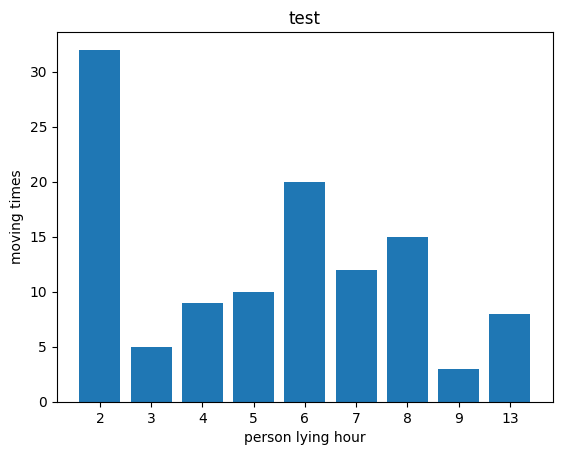

In [3]:
from matplotlib import pyplot as plt

plt.bar(range(len(dic)), list(dic.values()), align='center')
plt.xticks(range(len(dic)), list(dic.keys()))
plt.xlabel("person lying hour")
plt.ylabel("moving times")
plt.title("test")
plt.show()

No handles with labels found to put in legend.


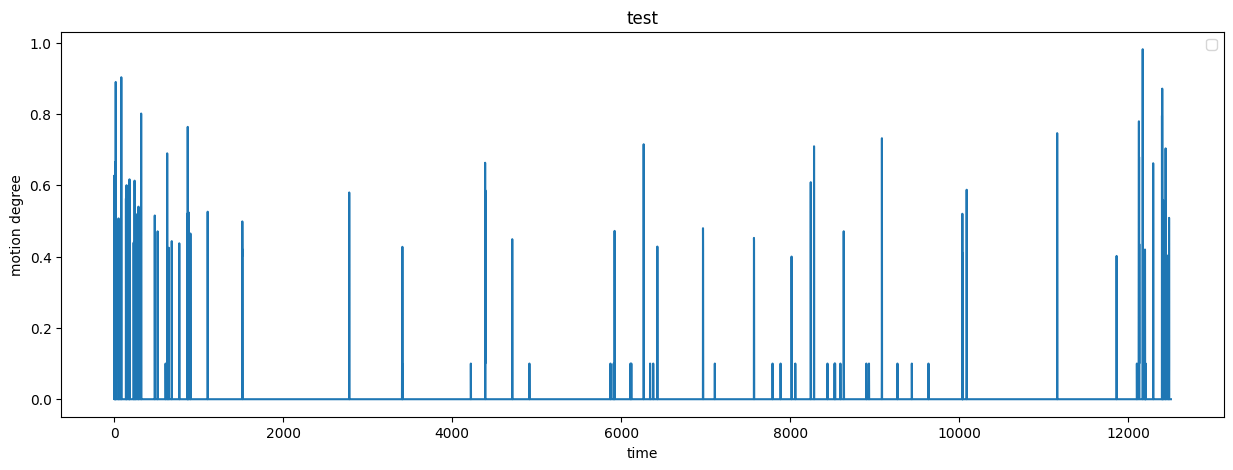

In [4]:
from matplotlib import pyplot as plt

fig= plt.figure(figsize=(15,5))
plt.xlabel("time")
plt.ylabel("motion degree")
plt.title("test")
plt.plot(moving_level_list)
plt.legend()
plt.show()

## 比較離散程度

In [12]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity
import shutil


def split_time(data_name):
    
    time = data_name.split(".")[0]       
    time = time.split("_t")
    day = time[0]
    hour = int((time[1])[:2])
    minute = int((time[1])[2:4])
    second = int((time[1])[4:6])
    
    return hour, minute, second

def to_second(h,m,s):
    
    return 3600*h + 60*m + s


def get_image_dev(image):
    
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    arr = np.array(img)
    arr2 = arr.flatten()
    stdev = np.std(arr2, ddof=1)
    
    return stdev


directory_name = r"D:\Dementia_Data_Preprocessing\testing_data\test_exist\mask"
directory_name_2 = r"D:\Dementia_Data_Preprocessing\testing_data\test_exist\4"
similarity_threshold = 1
time_threshold = 4
stdev_threshold = 12

aaa2 = []
bbb2 = []


list_A = []
list_B = []
num = 0
count = 0
moving_level_list = []
moving_time_list = []
hour_count = 0
hour_count_list = []
dic = {}
for filename in os.listdir(directory_name):
    num = num+1

    
    # motion detect start #########################################################
    
    
    if (num % 2) == 0:
        list_B = []      
        list_B.append(filename)
       
    else:
        list_A = [] 
        list_A.append(filename)   
    
    if len(list_A) != 0 and len(list_B) != 0:
        
        #print(list_A,list_B)
        h1,m1,s1 = split_time(list_A[0])

        h2,m2,s2 = split_time(list_B[0])
        
        if h1 == h2:
            dic[h2] = hour_count 
            
        elif h1<h2:
            dic[h1] = hour_count
            hour_count = 0
            
        else:
            dic[h2] = hour_count
            hour_count = 0
            
        # detect continous frame  ###################################################
                
#         if abs(to_second(h1,m1,s1) - to_second(h2,m2,s2)) > time_threshold:
#             print(f"{list_A[0],list_B[0]} are not continuous frame, skip")
#             continue
            
        # detect lying image  #######################################################
        
#         a_2 = cv2.imread(directory_name_2 + "\\" + list_A[0])
#         b_2 = cv2.imread(directory_name_2 + "\\" + list_B[0])
        
#         dev_a = get_image_dev(a_2)
#         dev_b = get_image_dev(b_2)
        
#         if dev_a < stdev_threshold and dev_b < stdev_threshold:
#             print(f"{list_A[0],list_B[0]} both are not lying image, skip")
#             continue
                      
        # identify similarity  ######################################################
        
        a = cv2.imread(directory_name + "\\" + list_A[0])
        b = cv2.imread(directory_name + "\\" + list_B[0])
        
        (score, diff) = structural_similarity(a,b, full=True,multichannel=True)
        #score = round(score,2)
        action = 1 - score 
        
        if score < similarity_threshold:
                    
            aaa2.append(score)
            bbb2.append(count)
            c = (list_A[0],list_B[0],f"SSIM: {score}")
            print(c)
            
            count+=1                 
            hour_count+=1
            
            
            
            #shutil.copyfile("D:/Dementia_Data_Preprocessing/testing_data/4" + "/" + list_A[0], "D:/motion_detect"+"/"+list_A[0])
            #shutil.copyfile("D:/Dementia_Data_Preprocessing/testing_data/4" + "/" + list_B[0], "D:/motion_detect"+"/"+list_B[0])            
                   
        else:
            score = 1
            
            
        moving_level_list.append(1-score) 
        
        
          
    else:
        continue
        
    
    ########################################################################################
        
        

print(" ")
print(f"total image: {num}")
print("detect moving times:", count)
print(dic)
print(len(moving_level_list))

('20210825_t021052.jpg', '20210825_t021054.jpg', 'SSIM: 0.6798594518282273')
('20210825_t021056.jpg', '20210825_t021054.jpg', 'SSIM: 0.6012228852234844')
('20210825_t021056.jpg', '20210825_t021058.jpg', 'SSIM: 0.8051383038735704')
('20210825_t021100.jpg', '20210825_t021058.jpg', 'SSIM: 0.7095848386352479')
('20210825_t021100.jpg', '20210825_t021102.jpg', 'SSIM: 0.7559148822427152')
('20210825_t021104.jpg', '20210825_t021102.jpg', 'SSIM: 0.8556598458840714')
('20210825_t021104.jpg', '20210825_t021106.jpg', 'SSIM: 0.9007129942707188')
('20210825_t021108.jpg', '20210825_t021106.jpg', 'SSIM: 0.8241471705511131')
('20210825_t021108.jpg', '20210825_t021110.jpg', 'SSIM: 0.8271163570211704')
('20210825_t021112.jpg', '20210825_t021110.jpg', 'SSIM: 0.8504890129984108')
('20210825_t021112.jpg', '20210825_t021114.jpg', 'SSIM: 0.9088931545301528')
('20210825_t021116.jpg', '20210825_t021114.jpg', 'SSIM: 0.8417253058651395')
('20210825_t021116.jpg', '20210825_t021118.jpg', 'SSIM: 0.8712732396214542')

('20210825_t021512.jpg', '20210825_t021514.jpg', 'SSIM: 0.7699327894323893')
('20210825_t021516.jpg', '20210825_t021514.jpg', 'SSIM: 0.9001667671637772')
('20210825_t021516.jpg', '20210825_t021518.jpg', 'SSIM: 0.9118970227662964')
('20210825_t021520.jpg', '20210825_t021518.jpg', 'SSIM: 0.8059404341590728')
('20210825_t021520.jpg', '20210825_t021522.jpg', 'SSIM: 0.819542878392427')
('20210825_t021524.jpg', '20210825_t021522.jpg', 'SSIM: 0.9024413058106209')
('20210825_t021524.jpg', '20210825_t021526.jpg', 'SSIM: 0.8908536891223338')
('20210825_t021528.jpg', '20210825_t021526.jpg', 'SSIM: 0.8737305277090501')
('20210825_t021528.jpg', '20210825_t021530.jpg', 'SSIM: 0.8513015838449018')
('20210825_t021532.jpg', '20210825_t021530.jpg', 'SSIM: 0.7861044360690339')
('20210825_t021532.jpg', '20210825_t021534.jpg', 'SSIM: 0.4907605559948932')
('20210825_t021536.jpg', '20210825_t021534.jpg', 'SSIM: 0.7632785811012808')
('20210825_t021536.jpg', '20210825_t021538.jpg', 'SSIM: 0.8051483040242381')


('20210825_t021916.jpg', '20210825_t021918.jpg', 'SSIM: 0.7805531416985529')
('20210825_t021920.jpg', '20210825_t021918.jpg', 'SSIM: 0.7266723969951745')
('20210825_t021920.jpg', '20210825_t021922.jpg', 'SSIM: 0.8526140876852114')
('20210825_t021924.jpg', '20210825_t021922.jpg', 'SSIM: 0.5399996337539656')
('20210825_t021924.jpg', '20210825_t021926.jpg', 'SSIM: 0.7465788218288273')
('20210825_t021928.jpg', '20210825_t021926.jpg', 'SSIM: 0.7794691740127719')
('20210825_t021928.jpg', '20210825_t021930.jpg', 'SSIM: 0.7842615955981943')
('20210825_t021932.jpg', '20210825_t021930.jpg', 'SSIM: 0.9406814789644532')
('20210825_t021932.jpg', '20210825_t021934.jpg', 'SSIM: 0.839971998826974')
('20210825_t021936.jpg', '20210825_t021934.jpg', 'SSIM: 0.8153291429791338')
('20210825_t021936.jpg', '20210825_t021938.jpg', 'SSIM: 0.8899922579509547')
('20210825_t021940.jpg', '20210825_t021938.jpg', 'SSIM: 0.8387972000769977')
('20210825_t021940.jpg', '20210825_t021942.jpg', 'SSIM: 0.8081287615623967')


('20210825_t022324.jpg', '20210825_t022322.jpg', 'SSIM: 0.8473082188087128')
('20210825_t022324.jpg', '20210825_t022326.jpg', 'SSIM: 0.7691341136563214')
('20210825_t022328.jpg', '20210825_t022326.jpg', 'SSIM: 0.8576993034505742')
('20210825_t022328.jpg', '20210825_t022330.jpg', 'SSIM: 0.8541899097521051')
('20210825_t022332.jpg', '20210825_t022330.jpg', 'SSIM: 0.9218896622369315')
('20210825_t022332.jpg', '20210825_t022334.jpg', 'SSIM: 0.9310086499423758')
('20210825_t022336.jpg', '20210825_t022334.jpg', 'SSIM: 0.8249710994456887')
('20210825_t022336.jpg', '20210825_t022338.jpg', 'SSIM: 0.751403883224551')
('20210825_t022340.jpg', '20210825_t022338.jpg', 'SSIM: 0.900240655450197')
('20210825_t022340.jpg', '20210825_t022342.jpg', 'SSIM: 0.7908281523378984')
('20210825_t022344.jpg', '20210825_t022342.jpg', 'SSIM: 0.8423824179652846')
('20210825_t022344.jpg', '20210825_t022346.jpg', 'SSIM: 0.8929953860017842')
('20210825_t022348.jpg', '20210825_t022346.jpg', 'SSIM: 0.8604399429103673')
(

('20210825_t022756.jpg', '20210825_t022754.jpg', 'SSIM: 0.8779914569633168')
('20210825_t022756.jpg', '20210825_t022758.jpg', 'SSIM: 0.8615775089695348')
('20210825_t022800.jpg', '20210825_t022758.jpg', 'SSIM: 0.8383735963333032')
('20210825_t022800.jpg', '20210825_t022802.jpg', 'SSIM: 0.7655926986600874')
('20210825_t022804.jpg', '20210825_t022802.jpg', 'SSIM: 0.5907036550368077')
('20210825_t022804.jpg', '20210825_t022806.jpg', 'SSIM: 0.7941816042639425')
('20210825_t022808.jpg', '20210825_t022806.jpg', 'SSIM: 0.9250211644265514')
('20210825_t022808.jpg', '20210825_t022810.jpg', 'SSIM: 0.8542311752326205')
('20210825_t022812.jpg', '20210825_t022810.jpg', 'SSIM: 0.8385260231288783')
('20210825_t022812.jpg', '20210825_t022814.jpg', 'SSIM: 0.8791622815959869')
('20210825_t022816.jpg', '20210825_t022814.jpg', 'SSIM: 0.8679145024610939')
('20210825_t022816.jpg', '20210825_t022818.jpg', 'SSIM: 0.9255566035744853')
('20210825_t022820.jpg', '20210825_t022818.jpg', 'SSIM: 0.9189133335209623')

('20210825_t023232.jpg', '20210825_t023234.jpg', 'SSIM: 0.851156274265283')
('20210825_t023236.jpg', '20210825_t023234.jpg', 'SSIM: 0.8841727102322672')
('20210825_t023236.jpg', '20210825_t023238.jpg', 'SSIM: 0.8514172751799525')
('20210825_t023240.jpg', '20210825_t023238.jpg', 'SSIM: 0.8678289674307273')
('20210825_t023240.jpg', '20210825_t023242.jpg', 'SSIM: 0.8641288642754887')
('20210825_t023244.jpg', '20210825_t023242.jpg', 'SSIM: 0.8693808733891693')
('20210825_t023244.jpg', '20210825_t023246.jpg', 'SSIM: 0.9237767415487042')
('20210825_t023248.jpg', '20210825_t023246.jpg', 'SSIM: 0.9213294055393273')
('20210825_t023248.jpg', '20210825_t023250.jpg', 'SSIM: 0.8286992949151211')
('20210825_t023252.jpg', '20210825_t023250.jpg', 'SSIM: 0.9402344415961095')
('20210825_t023252.jpg', '20210825_t023254.jpg', 'SSIM: 0.9451295410070594')
('20210825_t023256.jpg', '20210825_t023254.jpg', 'SSIM: 0.9251526386520299')
('20210825_t023256.jpg', '20210825_t023258.jpg', 'SSIM: 0.954844803144524')
(

('20210825_t023712.jpg', '20210825_t023714.jpg', 'SSIM: 0.9512898332554692')
('20210825_t023716.jpg', '20210825_t023714.jpg', 'SSIM: 0.9615598475210178')
('20210825_t023716.jpg', '20210825_t023718.jpg', 'SSIM: 0.9479247583916455')
('20210825_t023720.jpg', '20210825_t023718.jpg', 'SSIM: 0.8799723296386379')
('20210825_t023720.jpg', '20210825_t023722.jpg', 'SSIM: 0.9095492995226564')
('20210825_t023724.jpg', '20210825_t023722.jpg', 'SSIM: 0.8669745175442773')
('20210825_t023724.jpg', '20210825_t023726.jpg', 'SSIM: 0.8232655414551497')
('20210825_t023728.jpg', '20210825_t023726.jpg', 'SSIM: 0.8485908007702418')
('20210825_t023728.jpg', '20210825_t023730.jpg', 'SSIM: 0.8951267676936794')
('20210825_t023732.jpg', '20210825_t023730.jpg', 'SSIM: 0.8690333843938276')
('20210825_t023732.jpg', '20210825_t023734.jpg', 'SSIM: 0.9511411342658622')
('20210825_t023736.jpg', '20210825_t023734.jpg', 'SSIM: 0.8720950327215585')
('20210825_t023736.jpg', '20210825_t023738.jpg', 'SSIM: 0.9333578744870968')

('20210825_t024120.jpg', '20210825_t024118.jpg', 'SSIM: 0.9181235369968264')
('20210825_t024120.jpg', '20210825_t024122.jpg', 'SSIM: 0.8882060750244384')
('20210825_t024124.jpg', '20210825_t024122.jpg', 'SSIM: 0.8564915553552024')
('20210825_t024124.jpg', '20210825_t024126.jpg', 'SSIM: 0.9000151929561545')
('20210825_t024128.jpg', '20210825_t024126.jpg', 'SSIM: 0.8645678548657829')
('20210825_t024128.jpg', '20210825_t024130.jpg', 'SSIM: 0.8135176632030456')
('20210825_t024132.jpg', '20210825_t024130.jpg', 'SSIM: 0.8732551693180306')
('20210825_t024132.jpg', '20210825_t024134.jpg', 'SSIM: 0.9108187110641492')
('20210825_t024136.jpg', '20210825_t024134.jpg', 'SSIM: 0.8748457156843472')
('20210825_t024136.jpg', '20210825_t024138.jpg', 'SSIM: 0.8573545405449813')
('20210825_t024140.jpg', '20210825_t024138.jpg', 'SSIM: 0.9216507830285415')
('20210825_t024140.jpg', '20210825_t024142.jpg', 'SSIM: 0.908773906381975')
('20210825_t024144.jpg', '20210825_t024142.jpg', 'SSIM: 0.9203665754590504')


('20210825_t024544.jpg', '20210825_t024542.jpg', 'SSIM: 0.7767414217386142')
('20210825_t024544.jpg', '20210825_t024546.jpg', 'SSIM: 0.7805696954392447')
('20210825_t024548.jpg', '20210825_t024546.jpg', 'SSIM: 0.9034458387130861')
('20210825_t024548.jpg', '20210825_t024550.jpg', 'SSIM: 0.7835208166611746')
('20210825_t024552.jpg', '20210825_t024550.jpg', 'SSIM: 0.8632551333020013')
('20210825_t024552.jpg', '20210825_t024554.jpg', 'SSIM: 0.7107675451460582')
('20210825_t024556.jpg', '20210825_t024554.jpg', 'SSIM: 0.9243596509232912')
('20210825_t024556.jpg', '20210825_t024558.jpg', 'SSIM: 0.909205414620907')
('20210825_t024600.jpg', '20210825_t024558.jpg', 'SSIM: 0.9049337275688547')
('20210825_t024600.jpg', '20210825_t024602.jpg', 'SSIM: 0.8021228747566174')
('20210825_t024604.jpg', '20210825_t024602.jpg', 'SSIM: 0.8443143494951304')
('20210825_t024604.jpg', '20210825_t024606.jpg', 'SSIM: 0.893853109647088')
('20210825_t024608.jpg', '20210825_t024606.jpg', 'SSIM: 0.8923459410797463')
(

('20210825_t025020.jpg', '20210825_t025018.jpg', 'SSIM: 0.9117224734567493')
('20210825_t025020.jpg', '20210825_t025022.jpg', 'SSIM: 0.8746730622307216')
('20210825_t025024.jpg', '20210825_t025022.jpg', 'SSIM: 0.8139536813940671')
('20210825_t025024.jpg', '20210825_t025026.jpg', 'SSIM: 0.7945306523632587')
('20210825_t025028.jpg', '20210825_t025026.jpg', 'SSIM: 0.9468999193897556')
('20210825_t025028.jpg', '20210825_t025030.jpg', 'SSIM: 0.8912915700329319')
('20210825_t025032.jpg', '20210825_t025030.jpg', 'SSIM: 0.8402819821195612')
('20210825_t025032.jpg', '20210825_t025034.jpg', 'SSIM: 0.9092424788342193')
('20210825_t025036.jpg', '20210825_t025034.jpg', 'SSIM: 0.8449497083563289')
('20210825_t025036.jpg', '20210825_t025038.jpg', 'SSIM: 0.7682859781228457')
('20210825_t025040.jpg', '20210825_t025038.jpg', 'SSIM: 0.8380032657635927')
('20210825_t025040.jpg', '20210825_t025042.jpg', 'SSIM: 0.8583122380036365')
('20210825_t025044.jpg', '20210825_t025042.jpg', 'SSIM: 0.8820679013856503')

('20210825_t025448.jpg', '20210825_t025450.jpg', 'SSIM: 0.9174794352374729')
('20210825_t025452.jpg', '20210825_t025450.jpg', 'SSIM: 0.8298703926451926')
('20210825_t025452.jpg', '20210825_t025454.jpg', 'SSIM: 0.8669861172354612')
('20210825_t025456.jpg', '20210825_t025454.jpg', 'SSIM: 0.88711433690332')
('20210825_t025456.jpg', '20210825_t025458.jpg', 'SSIM: 0.8527588378777369')
('20210825_t025500.jpg', '20210825_t025458.jpg', 'SSIM: 0.8519239616917483')
('20210825_t025500.jpg', '20210825_t025502.jpg', 'SSIM: 0.9198029869436457')
('20210825_t025504.jpg', '20210825_t025502.jpg', 'SSIM: 0.7976729033160703')
('20210825_t025504.jpg', '20210825_t025506.jpg', 'SSIM: 0.7881571723568319')
('20210825_t025508.jpg', '20210825_t025506.jpg', 'SSIM: 0.8626049938596291')
('20210825_t025508.jpg', '20210825_t025510.jpg', 'SSIM: 0.859384379622421')
('20210825_t025512.jpg', '20210825_t025510.jpg', 'SSIM: 0.7819602846631246')
('20210825_t025512.jpg', '20210825_t025514.jpg', 'SSIM: 0.7753853642833801')
('

('20210825_t025924.jpg', '20210825_t025922.jpg', 'SSIM: 0.8460539363985503')
('20210825_t025924.jpg', '20210825_t025926.jpg', 'SSIM: 0.9233586905337801')
('20210825_t025928.jpg', '20210825_t025926.jpg', 'SSIM: 0.8812748608837517')
('20210825_t025928.jpg', '20210825_t025930.jpg', 'SSIM: 0.9017500464768322')
('20210825_t025932.jpg', '20210825_t025930.jpg', 'SSIM: 0.8769441045249784')
('20210825_t025932.jpg', '20210825_t025934.jpg', 'SSIM: 0.8468170033131333')
('20210825_t025936.jpg', '20210825_t025934.jpg', 'SSIM: 0.8203152041999295')
('20210825_t025936.jpg', '20210825_t025938.jpg', 'SSIM: 0.8152360001923489')
('20210825_t025940.jpg', '20210825_t025938.jpg', 'SSIM: 0.8908128323677488')
('20210825_t025940.jpg', '20210825_t025942.jpg', 'SSIM: 0.8641788211608145')
('20210825_t025944.jpg', '20210825_t025942.jpg', 'SSIM: 0.8443308790713971')
('20210825_t025944.jpg', '20210825_t025946.jpg', 'SSIM: 0.7751983730628627')
('20210825_t025948.jpg', '20210825_t025946.jpg', 'SSIM: 0.8135331023520047')

('20210825_t030358.jpg', '20210825_t030356.jpg', 'SSIM: 0.8761028094476264')
('20210825_t030358.jpg', '20210825_t030400.jpg', 'SSIM: 0.8864689332803656')
('20210825_t030402.jpg', '20210825_t030400.jpg', 'SSIM: 0.8717557251205938')
('20210825_t030402.jpg', '20210825_t030404.jpg', 'SSIM: 0.885081409608611')
('20210825_t030406.jpg', '20210825_t030404.jpg', 'SSIM: 0.9405753033983606')
('20210825_t030406.jpg', '20210825_t030408.jpg', 'SSIM: 0.9071450339866585')
('20210825_t030410.jpg', '20210825_t030408.jpg', 'SSIM: 0.858309494230209')
('20210825_t030410.jpg', '20210825_t030412.jpg', 'SSIM: 0.9026841814693931')
('20210825_t030414.jpg', '20210825_t030412.jpg', 'SSIM: 0.9177342712718124')
('20210825_t030414.jpg', '20210825_t030416.jpg', 'SSIM: 0.8880112601310565')
('20210825_t030418.jpg', '20210825_t030416.jpg', 'SSIM: 0.8934721778430359')
('20210825_t030418.jpg', '20210825_t030420.jpg', 'SSIM: 0.8998085940970343')
('20210825_t030422.jpg', '20210825_t030420.jpg', 'SSIM: 0.8375637307517949')
(

('20210825_t030830.jpg', '20210825_t030828.jpg', 'SSIM: 0.8467273958610277')
('20210825_t030830.jpg', '20210825_t030832.jpg', 'SSIM: 0.8538023910520848')
('20210825_t030834.jpg', '20210825_t030832.jpg', 'SSIM: 0.9346551254841263')
('20210825_t030834.jpg', '20210825_t030836.jpg', 'SSIM: 0.8704105278723255')
('20210825_t030838.jpg', '20210825_t030836.jpg', 'SSIM: 0.8871450929813691')
('20210825_t030838.jpg', '20210825_t030840.jpg', 'SSIM: 0.903008646151809')
('20210825_t030842.jpg', '20210825_t030840.jpg', 'SSIM: 0.8717328111302807')
('20210825_t030842.jpg', '20210825_t030844.jpg', 'SSIM: 0.8703830059089778')
('20210825_t030846.jpg', '20210825_t030844.jpg', 'SSIM: 0.8782118864332765')
('20210825_t030846.jpg', '20210825_t030848.jpg', 'SSIM: 0.854021887128751')
('20210825_t030850.jpg', '20210825_t030848.jpg', 'SSIM: 0.8481634368134134')
('20210825_t030850.jpg', '20210825_t030852.jpg', 'SSIM: 0.8967904432276956')
('20210825_t030854.jpg', '20210825_t030852.jpg', 'SSIM: 0.9429738836371125')
(

('20210825_t031258.jpg', '20210825_t031300.jpg', 'SSIM: 0.8772749007131841')
('20210825_t031302.jpg', '20210825_t031300.jpg', 'SSIM: 0.8368939576051496')
('20210825_t031302.jpg', '20210825_t031304.jpg', 'SSIM: 0.8494402807784023')
('20210825_t031306.jpg', '20210825_t031304.jpg', 'SSIM: 0.8635277918286881')
('20210825_t031306.jpg', '20210825_t031308.jpg', 'SSIM: 0.884380639416829')
('20210825_t031310.jpg', '20210825_t031308.jpg', 'SSIM: 0.9287589541177748')
('20210825_t031310.jpg', '20210825_t031312.jpg', 'SSIM: 0.8312441856307975')
('20210825_t031314.jpg', '20210825_t031312.jpg', 'SSIM: 0.8603990524406144')
('20210825_t031314.jpg', '20210825_t031316.jpg', 'SSIM: 0.9166220174301489')
('20210825_t031318.jpg', '20210825_t031316.jpg', 'SSIM: 0.8601066249653354')
('20210825_t031318.jpg', '20210825_t031320.jpg', 'SSIM: 0.8705347091927069')
('20210825_t031322.jpg', '20210825_t031320.jpg', 'SSIM: 0.9058237839509551')
('20210825_t031322.jpg', '20210825_t031324.jpg', 'SSIM: 0.8689035385622618')


('20210825_t031726.jpg', '20210825_t031724.jpg', 'SSIM: 0.8916125763592615')
('20210825_t031726.jpg', '20210825_t031728.jpg', 'SSIM: 0.9259416517510158')
('20210825_t031730.jpg', '20210825_t031728.jpg', 'SSIM: 0.8649394948036129')
('20210825_t031730.jpg', '20210825_t031732.jpg', 'SSIM: 0.8786213498087638')
('20210825_t031734.jpg', '20210825_t031732.jpg', 'SSIM: 0.8368679129182095')
('20210825_t031734.jpg', '20210825_t031736.jpg', 'SSIM: 0.9432412459930222')
('20210825_t031738.jpg', '20210825_t031736.jpg', 'SSIM: 0.9310371319363271')
('20210825_t031738.jpg', '20210825_t031740.jpg', 'SSIM: 0.8983642847150142')
('20210825_t031742.jpg', '20210825_t031740.jpg', 'SSIM: 0.8873171184172735')
('20210825_t031742.jpg', '20210825_t031744.jpg', 'SSIM: 0.9222937883099114')
('20210825_t031746.jpg', '20210825_t031744.jpg', 'SSIM: 0.9728382296380151')
('20210825_t031746.jpg', '20210825_t031748.jpg', 'SSIM: 0.9020521721559671')
('20210825_t031750.jpg', '20210825_t031748.jpg', 'SSIM: 0.8748855560385478')

('20210825_t032152.jpg', '20210825_t032154.jpg', 'SSIM: 0.8611585786110916')
('20210825_t032156.jpg', '20210825_t032154.jpg', 'SSIM: 0.9173377360353536')
('20210825_t032156.jpg', '20210825_t032158.jpg', 'SSIM: 0.8009969932992361')
('20210825_t032200.jpg', '20210825_t032158.jpg', 'SSIM: 0.9305726236846266')
('20210825_t032200.jpg', '20210825_t032202.jpg', 'SSIM: 0.9061346742459369')
('20210825_t032204.jpg', '20210825_t032202.jpg', 'SSIM: 0.892638194721739')
('20210825_t032204.jpg', '20210825_t032206.jpg', 'SSIM: 0.8588735638003214')
('20210825_t032208.jpg', '20210825_t032206.jpg', 'SSIM: 0.8574155677560258')
('20210825_t032208.jpg', '20210825_t032210.jpg', 'SSIM: 0.8725860125663516')
('20210825_t032212.jpg', '20210825_t032210.jpg', 'SSIM: 0.8947902193202142')
('20210825_t032212.jpg', '20210825_t032214.jpg', 'SSIM: 0.9242451987425478')
('20210825_t032216.jpg', '20210825_t032214.jpg', 'SSIM: 0.8793589421441748')
('20210825_t032216.jpg', '20210825_t032218.jpg', 'SSIM: 0.9617486105697397')


('20210825_t032628.jpg', '20210825_t032626.jpg', 'SSIM: 0.8833007199583998')
('20210825_t032628.jpg', '20210825_t032630.jpg', 'SSIM: 0.8958961627843538')
('20210825_t032632.jpg', '20210825_t032630.jpg', 'SSIM: 0.901732943024395')
('20210825_t032632.jpg', '20210825_t032634.jpg', 'SSIM: 0.866977155275291')
('20210825_t032636.jpg', '20210825_t032634.jpg', 'SSIM: 0.9030869075184491')
('20210825_t032636.jpg', '20210825_t032638.jpg', 'SSIM: 0.8097237449253203')
('20210825_t032640.jpg', '20210825_t032638.jpg', 'SSIM: 0.9609437016646147')
('20210825_t032640.jpg', '20210825_t032642.jpg', 'SSIM: 0.9139291324231922')
('20210825_t032644.jpg', '20210825_t032642.jpg', 'SSIM: 0.8953271333080579')
('20210825_t032644.jpg', '20210825_t032646.jpg', 'SSIM: 0.89090063145774')
('20210825_t032648.jpg', '20210825_t032646.jpg', 'SSIM: 0.8592590368022226')
('20210825_t032648.jpg', '20210825_t032650.jpg', 'SSIM: 0.8538875543663607')
('20210825_t032652.jpg', '20210825_t032650.jpg', 'SSIM: 0.8910616690148235')
('2

('20210825_t033104.jpg', '20210825_t033102.jpg', 'SSIM: 0.8013631109878532')
('20210825_t033104.jpg', '20210825_t033106.jpg', 'SSIM: 0.8146766814265489')
('20210825_t033108.jpg', '20210825_t033106.jpg', 'SSIM: 0.8824948156472815')
('20210825_t033108.jpg', '20210825_t033110.jpg', 'SSIM: 0.8286364857882536')
('20210825_t033112.jpg', '20210825_t033110.jpg', 'SSIM: 0.8444943625674088')
('20210825_t033112.jpg', '20210825_t033114.jpg', 'SSIM: 0.8775874434550518')
('20210825_t033116.jpg', '20210825_t033114.jpg', 'SSIM: 0.8411636570834543')
('20210825_t033116.jpg', '20210825_t033118.jpg', 'SSIM: 0.904505535730169')
('20210825_t033120.jpg', '20210825_t033118.jpg', 'SSIM: 0.8599455464448025')
('20210825_t033120.jpg', '20210825_t033122.jpg', 'SSIM: 0.8475455014450199')
('20210825_t033124.jpg', '20210825_t033122.jpg', 'SSIM: 0.7771545341423747')
('20210825_t033124.jpg', '20210825_t033126.jpg', 'SSIM: 0.7539512991040479')
('20210825_t033128.jpg', '20210825_t033126.jpg', 'SSIM: 0.911597215312178')
(

('20210825_t033540.jpg', '20210825_t033542.jpg', 'SSIM: 0.9200815388029547')
('20210825_t033544.jpg', '20210825_t033542.jpg', 'SSIM: 0.8445029715995638')
('20210825_t033544.jpg', '20210825_t033546.jpg', 'SSIM: 0.7927887538414616')
('20210825_t033548.jpg', '20210825_t033546.jpg', 'SSIM: 0.8704794128919567')
('20210825_t033548.jpg', '20210825_t033550.jpg', 'SSIM: 0.8895933440627111')
('20210825_t033552.jpg', '20210825_t033550.jpg', 'SSIM: 0.8915327013333546')
('20210825_t033552.jpg', '20210825_t033554.jpg', 'SSIM: 0.8881680662502239')
('20210825_t033556.jpg', '20210825_t033554.jpg', 'SSIM: 0.9064243782770369')
('20210825_t033556.jpg', '20210825_t033558.jpg', 'SSIM: 0.9241897345968553')
('20210825_t033600.jpg', '20210825_t033558.jpg', 'SSIM: 0.9059529645408673')
('20210825_t033600.jpg', '20210825_t033602.jpg', 'SSIM: 0.9116172003155341')
('20210825_t033604.jpg', '20210825_t033602.jpg', 'SSIM: 0.8561284718093748')
('20210825_t033604.jpg', '20210825_t033606.jpg', 'SSIM: 0.9478409625746813')

('20210825_t034020.jpg', '20210825_t034022.jpg', 'SSIM: 0.902421852265096')
('20210825_t034024.jpg', '20210825_t034022.jpg', 'SSIM: 0.887215354540217')
('20210825_t034024.jpg', '20210825_t034026.jpg', 'SSIM: 0.8701018680752427')
('20210825_t034028.jpg', '20210825_t034026.jpg', 'SSIM: 0.8148745406539144')
('20210825_t034028.jpg', '20210825_t034030.jpg', 'SSIM: 0.8829510769113412')
('20210825_t034032.jpg', '20210825_t034030.jpg', 'SSIM: 0.8697822062266465')
('20210825_t034032.jpg', '20210825_t034034.jpg', 'SSIM: 0.7654463694328928')
('20210825_t034036.jpg', '20210825_t034034.jpg', 'SSIM: 0.7770104673560216')
('20210825_t034036.jpg', '20210825_t034038.jpg', 'SSIM: 0.8930023362027939')
('20210825_t034040.jpg', '20210825_t034038.jpg', 'SSIM: 0.9120490648855295')
('20210825_t034040.jpg', '20210825_t034042.jpg', 'SSIM: 0.9017029426596965')
('20210825_t034044.jpg', '20210825_t034042.jpg', 'SSIM: 0.8540006148238437')
('20210825_t034044.jpg', '20210825_t034046.jpg', 'SSIM: 0.7063046551343691')
(

('20210825_t034452.jpg', '20210825_t034454.jpg', 'SSIM: 0.9317597334960105')
('20210825_t034456.jpg', '20210825_t034454.jpg', 'SSIM: 0.8540894344773831')
('20210825_t034456.jpg', '20210825_t034458.jpg', 'SSIM: 0.9335158546819041')
('20210825_t034500.jpg', '20210825_t034458.jpg', 'SSIM: 0.9139755189076777')
('20210825_t034500.jpg', '20210825_t034502.jpg', 'SSIM: 0.9087841164246313')
('20210825_t034504.jpg', '20210825_t034502.jpg', 'SSIM: 0.8878224714470272')
('20210825_t034504.jpg', '20210825_t034506.jpg', 'SSIM: 0.8801674469270848')
('20210825_t034508.jpg', '20210825_t034506.jpg', 'SSIM: 0.8944347560079171')
('20210825_t034508.jpg', '20210825_t034510.jpg', 'SSIM: 0.8667692530792865')
('20210825_t034512.jpg', '20210825_t034510.jpg', 'SSIM: 0.8539918315879742')
('20210825_t034512.jpg', '20210825_t034514.jpg', 'SSIM: 0.8902228940962592')
('20210825_t034516.jpg', '20210825_t034514.jpg', 'SSIM: 0.84446703257954')
('20210825_t034516.jpg', '20210825_t034518.jpg', 'SSIM: 0.8445051043292697')
(

('20210825_t034930.jpg', '20210825_t034932.jpg', 'SSIM: 0.8170992875722489')
('20210825_t034934.jpg', '20210825_t034932.jpg', 'SSIM: 0.8370693353276545')
('20210825_t034934.jpg', '20210825_t034936.jpg', 'SSIM: 0.8836390163248397')
('20210825_t034938.jpg', '20210825_t034936.jpg', 'SSIM: 0.9105083842789512')
('20210825_t034938.jpg', '20210825_t034940.jpg', 'SSIM: 0.8264317940383761')
('20210825_t034942.jpg', '20210825_t034940.jpg', 'SSIM: 0.8213470195518217')
('20210825_t034942.jpg', '20210825_t034944.jpg', 'SSIM: 0.8994446603537378')
('20210825_t034946.jpg', '20210825_t034944.jpg', 'SSIM: 0.787438795723302')
('20210825_t034946.jpg', '20210825_t034948.jpg', 'SSIM: 0.8996147582168281')
('20210825_t034950.jpg', '20210825_t034948.jpg', 'SSIM: 0.8656704496324009')
('20210825_t034950.jpg', '20210825_t034952.jpg', 'SSIM: 0.890673929431836')
('20210825_t034954.jpg', '20210825_t034952.jpg', 'SSIM: 0.8173103388679805')
('20210825_t034954.jpg', '20210825_t034956.jpg', 'SSIM: 0.8099777448422303')
(

('20210825_t035358.jpg', '20210825_t035356.jpg', 'SSIM: 0.9490731354736895')
('20210825_t035358.jpg', '20210825_t035400.jpg', 'SSIM: 0.9243472377484008')
('20210825_t035402.jpg', '20210825_t035400.jpg', 'SSIM: 0.8351506515632062')
('20210825_t035402.jpg', '20210825_t035404.jpg', 'SSIM: 0.8370985557605046')
('20210825_t035406.jpg', '20210825_t035404.jpg', 'SSIM: 0.8520903772415049')
('20210825_t035406.jpg', '20210825_t035408.jpg', 'SSIM: 0.9381078536205067')
('20210825_t035410.jpg', '20210825_t035408.jpg', 'SSIM: 0.8609747748580865')
('20210825_t035410.jpg', '20210825_t035412.jpg', 'SSIM: 0.9078206298178328')
('20210825_t035414.jpg', '20210825_t035412.jpg', 'SSIM: 0.8600893976877293')
('20210825_t035414.jpg', '20210825_t035416.jpg', 'SSIM: 0.82814153803354')
('20210825_t035418.jpg', '20210825_t035416.jpg', 'SSIM: 0.7510800322221943')
('20210825_t035418.jpg', '20210825_t035420.jpg', 'SSIM: 0.7469892022688568')
('20210825_t035422.jpg', '20210825_t035420.jpg', 'SSIM: 0.8894831806536703')
(

('20210825_t035838.jpg', '20210825_t035836.jpg', 'SSIM: 0.9098579692124696')
('20210825_t035838.jpg', '20210825_t035840.jpg', 'SSIM: 0.8919866980459064')
('20210825_t035842.jpg', '20210825_t035840.jpg', 'SSIM: 0.8361521955813207')
('20210825_t035842.jpg', '20210825_t035844.jpg', 'SSIM: 0.8235565828614606')
('20210825_t035846.jpg', '20210825_t035844.jpg', 'SSIM: 0.9183269268350442')
('20210825_t035846.jpg', '20210825_t035848.jpg', 'SSIM: 0.8491745793922115')
('20210825_t035850.jpg', '20210825_t035848.jpg', 'SSIM: 0.9128153170417986')
('20210825_t035850.jpg', '20210825_t035852.jpg', 'SSIM: 0.8915735542286775')
('20210825_t035854.jpg', '20210825_t035852.jpg', 'SSIM: 0.9169516306439034')
('20210825_t035854.jpg', '20210825_t035856.jpg', 'SSIM: 0.7774789905269615')
('20210825_t035858.jpg', '20210825_t035856.jpg', 'SSIM: 0.8496047178224684')
('20210825_t035858.jpg', '20210825_t035900.jpg', 'SSIM: 0.8700349463109402')
('20210825_t035902.jpg', '20210825_t035900.jpg', 'SSIM: 0.8497331309707737')

('20210825_t040318.jpg', '20210825_t040320.jpg', 'SSIM: 0.8118790431798958')
('20210825_t040322.jpg', '20210825_t040320.jpg', 'SSIM: 0.8495265894734083')
('20210825_t040322.jpg', '20210825_t040324.jpg', 'SSIM: 0.9153663035597945')
('20210825_t040326.jpg', '20210825_t040324.jpg', 'SSIM: 0.8641605007761362')
('20210825_t040326.jpg', '20210825_t040328.jpg', 'SSIM: 0.8572330084827441')
('20210825_t040330.jpg', '20210825_t040328.jpg', 'SSIM: 0.8605585514421944')
('20210825_t040330.jpg', '20210825_t040332.jpg', 'SSIM: 0.8591235947495128')
('20210825_t040334.jpg', '20210825_t040332.jpg', 'SSIM: 0.7823673709291847')
('20210825_t040334.jpg', '20210825_t040336.jpg', 'SSIM: 0.9048091954617968')
('20210825_t040338.jpg', '20210825_t040336.jpg', 'SSIM: 0.8449284144076139')
('20210825_t040338.jpg', '20210825_t040340.jpg', 'SSIM: 0.9113416898574954')
('20210825_t040342.jpg', '20210825_t040340.jpg', 'SSIM: 0.8859744209465379')
('20210825_t040342.jpg', '20210825_t040344.jpg', 'SSIM: 0.8391044005014066')

('20210825_t040802.jpg', '20210825_t040800.jpg', 'SSIM: 0.8079909267169538')
('20210825_t040802.jpg', '20210825_t040804.jpg', 'SSIM: 0.8688369510269665')
('20210825_t040806.jpg', '20210825_t040804.jpg', 'SSIM: 0.8624325651315544')
('20210825_t040806.jpg', '20210825_t040808.jpg', 'SSIM: 0.950340437323901')
('20210825_t040810.jpg', '20210825_t040808.jpg', 'SSIM: 0.8516609496075251')
('20210825_t040810.jpg', '20210825_t040812.jpg', 'SSIM: 0.8821984898807269')
('20210825_t040814.jpg', '20210825_t040812.jpg', 'SSIM: 0.8458305147648273')
('20210825_t040814.jpg', '20210825_t040816.jpg', 'SSIM: 0.8494588362300385')
('20210825_t040818.jpg', '20210825_t040816.jpg', 'SSIM: 0.8297348308746612')
('20210825_t040818.jpg', '20210825_t040820.jpg', 'SSIM: 0.8273141804123039')
('20210825_t040822.jpg', '20210825_t040820.jpg', 'SSIM: 0.8642408268458605')
('20210825_t040822.jpg', '20210825_t040824.jpg', 'SSIM: 0.8863568458003996')
('20210825_t040826.jpg', '20210825_t040824.jpg', 'SSIM: 0.8422414504404802')


('20210825_t041238.jpg', '20210825_t041240.jpg', 'SSIM: 0.8182556500226386')
('20210825_t041242.jpg', '20210825_t041240.jpg', 'SSIM: 0.8341495248862074')
('20210825_t041242.jpg', '20210825_t041244.jpg', 'SSIM: 0.9262352161675207')
('20210825_t041246.jpg', '20210825_t041244.jpg', 'SSIM: 0.8798730067470495')
('20210825_t041246.jpg', '20210825_t041248.jpg', 'SSIM: 0.9091099368323307')
('20210825_t041250.jpg', '20210825_t041248.jpg', 'SSIM: 0.9241559500599066')
('20210825_t041250.jpg', '20210825_t041252.jpg', 'SSIM: 0.896527785371404')
('20210825_t041254.jpg', '20210825_t041252.jpg', 'SSIM: 0.8212589555092584')
('20210825_t041254.jpg', '20210825_t041256.jpg', 'SSIM: 0.8557788797490962')
('20210825_t041258.jpg', '20210825_t041256.jpg', 'SSIM: 0.8807221798630969')
('20210825_t041258.jpg', '20210825_t041300.jpg', 'SSIM: 0.907050589889455')
('20210825_t041302.jpg', '20210825_t041300.jpg', 'SSIM: 0.901095437883444')
('20210825_t041302.jpg', '20210825_t041304.jpg', 'SSIM: 0.9363928986775911')
('

('20210825_t041724.jpg', '20210825_t041726.jpg', 'SSIM: 0.8821958024121712')
('20210825_t041728.jpg', '20210825_t041726.jpg', 'SSIM: 0.7794327752522006')
('20210825_t041728.jpg', '20210825_t041730.jpg', 'SSIM: 0.8884584861547904')
('20210825_t041732.jpg', '20210825_t041730.jpg', 'SSIM: 0.8937221300162924')
('20210825_t041732.jpg', '20210825_t041734.jpg', 'SSIM: 0.7837220647435766')
('20210825_t041736.jpg', '20210825_t041734.jpg', 'SSIM: 0.8844593565743633')
('20210825_t041736.jpg', '20210825_t041738.jpg', 'SSIM: 0.8818492831756012')
('20210825_t041740.jpg', '20210825_t041738.jpg', 'SSIM: 0.8201927497224935')
('20210825_t041740.jpg', '20210825_t041742.jpg', 'SSIM: 0.8942675294985054')
('20210825_t041744.jpg', '20210825_t041742.jpg', 'SSIM: 0.8416159436316175')
('20210825_t041744.jpg', '20210825_t041746.jpg', 'SSIM: 0.7700284951398899')
('20210825_t041748.jpg', '20210825_t041746.jpg', 'SSIM: 0.8510546766999356')
('20210825_t041748.jpg', '20210825_t041750.jpg', 'SSIM: 0.8442021510170211')

('20210825_t042204.jpg', '20210825_t042206.jpg', 'SSIM: 0.8637195908743275')
('20210825_t042208.jpg', '20210825_t042206.jpg', 'SSIM: 0.8462364458945446')
('20210825_t042208.jpg', '20210825_t042210.jpg', 'SSIM: 0.8623863587013925')
('20210825_t042212.jpg', '20210825_t042210.jpg', 'SSIM: 0.7835234518690875')
('20210825_t042212.jpg', '20210825_t042214.jpg', 'SSIM: 0.8900292434579389')
('20210825_t042216.jpg', '20210825_t042214.jpg', 'SSIM: 0.8958492850549216')
('20210825_t042216.jpg', '20210825_t042218.jpg', 'SSIM: 0.9171827520739878')
('20210825_t042220.jpg', '20210825_t042218.jpg', 'SSIM: 0.903850045835482')
('20210825_t042220.jpg', '20210825_t042222.jpg', 'SSIM: 0.7948274545674904')
('20210825_t042224.jpg', '20210825_t042222.jpg', 'SSIM: 0.8308750147925807')
('20210825_t042224.jpg', '20210825_t042226.jpg', 'SSIM: 0.8636460387820617')
('20210825_t042228.jpg', '20210825_t042226.jpg', 'SSIM: 0.8935044783966704')
('20210825_t042228.jpg', '20210825_t042230.jpg', 'SSIM: 0.9051077922164426')


('20210825_t042644.jpg', '20210825_t042646.jpg', 'SSIM: 0.868703299274031')
('20210825_t042648.jpg', '20210825_t042646.jpg', 'SSIM: 0.8320104896983894')
('20210825_t042648.jpg', '20210825_t042650.jpg', 'SSIM: 0.7789716516954395')
('20210825_t042652.jpg', '20210825_t042650.jpg', 'SSIM: 0.8315695312995702')
('20210825_t042652.jpg', '20210825_t042654.jpg', 'SSIM: 0.9125166354250687')
('20210825_t042656.jpg', '20210825_t042654.jpg', 'SSIM: 0.8306473658761677')
('20210825_t042656.jpg', '20210825_t042658.jpg', 'SSIM: 0.8099654870580386')
('20210825_t042700.jpg', '20210825_t042658.jpg', 'SSIM: 0.8218463936137088')
('20210825_t042700.jpg', '20210825_t042702.jpg', 'SSIM: 0.8348160902589777')
('20210825_t042704.jpg', '20210825_t042702.jpg', 'SSIM: 0.8895321396919044')
('20210825_t042704.jpg', '20210825_t042706.jpg', 'SSIM: 0.73589844025352')
('20210825_t042708.jpg', '20210825_t042706.jpg', 'SSIM: 0.7083023681357732')
('20210825_t042708.jpg', '20210825_t042710.jpg', 'SSIM: 0.7209230056562018')
('

('20210825_t043128.jpg', '20210825_t043126.jpg', 'SSIM: 0.8790462703502342')
('20210825_t043128.jpg', '20210825_t043130.jpg', 'SSIM: 0.8005009330001043')
('20210825_t043132.jpg', '20210825_t043130.jpg', 'SSIM: 0.8468394243464863')
('20210825_t043132.jpg', '20210825_t043134.jpg', 'SSIM: 0.8930771085549336')
('20210825_t043136.jpg', '20210825_t043134.jpg', 'SSIM: 0.8950811859442283')
('20210825_t043136.jpg', '20210825_t043138.jpg', 'SSIM: 0.8484022739072253')
('20210825_t043140.jpg', '20210825_t043138.jpg', 'SSIM: 0.8506753412178081')
('20210825_t043140.jpg', '20210825_t043142.jpg', 'SSIM: 0.7747220705480085')
('20210825_t043144.jpg', '20210825_t043142.jpg', 'SSIM: 0.6857362387036912')
('20210825_t043144.jpg', '20210825_t043146.jpg', 'SSIM: 0.7745994042613906')
('20210825_t043148.jpg', '20210825_t043146.jpg', 'SSIM: 0.7841078221665222')
('20210825_t043148.jpg', '20210825_t043150.jpg', 'SSIM: 0.7916582554847039')
('20210825_t043152.jpg', '20210825_t043150.jpg', 'SSIM: 0.8977548397803792')

('20210825_t043604.jpg', '20210825_t043606.jpg', 'SSIM: 0.8387167006431506')
('20210825_t043608.jpg', '20210825_t043606.jpg', 'SSIM: 0.7341245995598921')
('20210825_t043608.jpg', '20210825_t043610.jpg', 'SSIM: 0.7677155645550218')
('20210825_t043612.jpg', '20210825_t043610.jpg', 'SSIM: 0.8386294173466775')
('20210825_t043612.jpg', '20210825_t043614.jpg', 'SSIM: 0.7895304534641046')
('20210825_t043616.jpg', '20210825_t043614.jpg', 'SSIM: 0.8477703844644421')
('20210825_t043616.jpg', '20210825_t043618.jpg', 'SSIM: 0.8636620770412259')
('20210825_t043620.jpg', '20210825_t043618.jpg', 'SSIM: 0.818666331168357')
('20210825_t043620.jpg', '20210825_t043622.jpg', 'SSIM: 0.8398415094248666')
('20210825_t043624.jpg', '20210825_t043622.jpg', 'SSIM: 0.8574867477502386')
('20210825_t043624.jpg', '20210825_t043626.jpg', 'SSIM: 0.7749578946655922')
('20210825_t043628.jpg', '20210825_t043626.jpg', 'SSIM: 0.9090710144439916')
('20210825_t043628.jpg', '20210825_t043630.jpg', 'SSIM: 0.7942331597264384')


('20210825_t044048.jpg', '20210825_t044050.jpg', 'SSIM: 0.8413107270497765')
('20210825_t044052.jpg', '20210825_t044050.jpg', 'SSIM: 0.8431496258657598')
('20210825_t044052.jpg', '20210825_t044054.jpg', 'SSIM: 0.8781969901299986')
('20210825_t044056.jpg', '20210825_t044054.jpg', 'SSIM: 0.9069215180291657')
('20210825_t044056.jpg', '20210825_t044058.jpg', 'SSIM: 0.8821493216917312')
('20210825_t044100.jpg', '20210825_t044058.jpg', 'SSIM: 0.8231499231683526')
('20210825_t044100.jpg', '20210825_t044102.jpg', 'SSIM: 0.8124255424459382')
('20210825_t044104.jpg', '20210825_t044102.jpg', 'SSIM: 0.8548260592774646')
('20210825_t044104.jpg', '20210825_t044106.jpg', 'SSIM: 0.905202650059729')
('20210825_t044108.jpg', '20210825_t044106.jpg', 'SSIM: 0.8370310807367332')
('20210825_t044108.jpg', '20210825_t044110.jpg', 'SSIM: 0.8587347559608881')
('20210825_t044112.jpg', '20210825_t044110.jpg', 'SSIM: 0.8353167771885117')
('20210825_t044112.jpg', '20210825_t044114.jpg', 'SSIM: 0.8287357487143407')


('20210825_t044528.jpg', '20210825_t044526.jpg', 'SSIM: 0.879507159575761')
('20210825_t044528.jpg', '20210825_t044530.jpg', 'SSIM: 0.8206584009462847')
('20210825_t044532.jpg', '20210825_t044530.jpg', 'SSIM: 0.8382626885637192')
('20210825_t044532.jpg', '20210825_t044534.jpg', 'SSIM: 0.9001013823899164')
('20210825_t044536.jpg', '20210825_t044534.jpg', 'SSIM: 0.8700082884193323')
('20210825_t044536.jpg', '20210825_t044538.jpg', 'SSIM: 0.8768220193884434')
('20210825_t044540.jpg', '20210825_t044538.jpg', 'SSIM: 0.8632273747992736')
('20210825_t044540.jpg', '20210825_t044542.jpg', 'SSIM: 0.8402820144477028')
('20210825_t044544.jpg', '20210825_t044542.jpg', 'SSIM: 0.9053052858823766')
('20210825_t044544.jpg', '20210825_t044546.jpg', 'SSIM: 0.7553819353528409')
('20210825_t044548.jpg', '20210825_t044546.jpg', 'SSIM: 0.7658672314328561')
('20210825_t044548.jpg', '20210825_t044550.jpg', 'SSIM: 0.8217920604765592')
('20210825_t044552.jpg', '20210825_t044550.jpg', 'SSIM: 0.8350508731301376')


('20210825_t045012.jpg', '20210825_t045010.jpg', 'SSIM: 0.903828901644962')
('20210825_t045012.jpg', '20210825_t045014.jpg', 'SSIM: 0.7498754340991055')
('20210825_t045016.jpg', '20210825_t045014.jpg', 'SSIM: 0.8898192104047506')
('20210825_t045016.jpg', '20210825_t045018.jpg', 'SSIM: 0.8590902742929161')
('20210825_t045020.jpg', '20210825_t045018.jpg', 'SSIM: 0.9001243769680569')
('20210825_t045020.jpg', '20210825_t045022.jpg', 'SSIM: 0.8494981213986006')
('20210825_t045024.jpg', '20210825_t045022.jpg', 'SSIM: 0.8395835050645253')
('20210825_t045024.jpg', '20210825_t045026.jpg', 'SSIM: 0.88557297892428')
('20210825_t045028.jpg', '20210825_t045026.jpg', 'SSIM: 0.9345602765724161')
('20210825_t045028.jpg', '20210825_t045030.jpg', 'SSIM: 0.876375870596933')
('20210825_t045032.jpg', '20210825_t045030.jpg', 'SSIM: 0.8178542511561004')
('20210825_t045032.jpg', '20210825_t045034.jpg', 'SSIM: 0.8712285514017863')
('20210825_t045036.jpg', '20210825_t045034.jpg', 'SSIM: 0.8710463215923235')
('2

('20210825_t045452.jpg', '20210825_t045450.jpg', 'SSIM: 0.8478862225832899')
('20210825_t045452.jpg', '20210825_t045454.jpg', 'SSIM: 0.8267443858697572')
('20210825_t045456.jpg', '20210825_t045454.jpg', 'SSIM: 0.8652654204111749')
('20210825_t045456.jpg', '20210825_t045458.jpg', 'SSIM: 0.8591089486618607')
('20210825_t045500.jpg', '20210825_t045458.jpg', 'SSIM: 0.8336136849617442')
('20210825_t045500.jpg', '20210825_t045502.jpg', 'SSIM: 0.835520424940819')
('20210825_t045504.jpg', '20210825_t045502.jpg', 'SSIM: 0.8981634475371706')
('20210825_t045504.jpg', '20210825_t045506.jpg', 'SSIM: 0.7957852394200298')
('20210825_t045508.jpg', '20210825_t045506.jpg', 'SSIM: 0.8529437601576327')
('20210825_t045508.jpg', '20210825_t045510.jpg', 'SSIM: 0.8357304136480099')
('20210825_t045512.jpg', '20210825_t045510.jpg', 'SSIM: 0.8690143316850302')
('20210825_t045512.jpg', '20210825_t045514.jpg', 'SSIM: 0.8837758165646042')
('20210825_t045516.jpg', '20210825_t045514.jpg', 'SSIM: 0.8325906463223818')


('20210825_t045932.jpg', '20210825_t045934.jpg', 'SSIM: 0.8451281817311236')
('20210825_t045936.jpg', '20210825_t045934.jpg', 'SSIM: 0.8633228614829846')
('20210825_t045936.jpg', '20210825_t045938.jpg', 'SSIM: 0.8535417212066561')
('20210825_t045940.jpg', '20210825_t045938.jpg', 'SSIM: 0.8048084792534222')
('20210825_t045940.jpg', '20210825_t045942.jpg', 'SSIM: 0.8701061973443187')
('20210825_t045944.jpg', '20210825_t045942.jpg', 'SSIM: 0.8991940456668781')
('20210825_t045944.jpg', '20210825_t045946.jpg', 'SSIM: 0.8893084556440631')
('20210825_t045948.jpg', '20210825_t045946.jpg', 'SSIM: 0.7505412261001939')
('20210825_t045948.jpg', '20210825_t045950.jpg', 'SSIM: 0.8049415508651928')
('20210825_t045952.jpg', '20210825_t045950.jpg', 'SSIM: 0.8235632186491901')
('20210825_t045952.jpg', '20210825_t045954.jpg', 'SSIM: 0.8586737891985863')
('20210825_t045956.jpg', '20210825_t045954.jpg', 'SSIM: 0.9324927241602259')
('20210825_t045956.jpg', '20210825_t045958.jpg', 'SSIM: 0.9208601906284268')

('20210825_t050416.jpg', '20210825_t050414.jpg', 'SSIM: 0.7994235682168218')
('20210825_t050416.jpg', '20210825_t050418.jpg', 'SSIM: 0.7422713613702913')
('20210825_t050420.jpg', '20210825_t050418.jpg', 'SSIM: 0.8358305486208406')
('20210825_t050420.jpg', '20210825_t050422.jpg', 'SSIM: 0.8722726373748386')
('20210825_t050424.jpg', '20210825_t050422.jpg', 'SSIM: 0.7938456493395477')
('20210825_t050424.jpg', '20210825_t050426.jpg', 'SSIM: 0.8210053162786977')
('20210825_t050428.jpg', '20210825_t050426.jpg', 'SSIM: 0.8700362505013075')
('20210825_t050428.jpg', '20210825_t050430.jpg', 'SSIM: 0.8984919996991684')
('20210825_t050432.jpg', '20210825_t050430.jpg', 'SSIM: 0.8626886627716807')
('20210825_t050432.jpg', '20210825_t050434.jpg', 'SSIM: 0.9071300418110464')
('20210825_t050436.jpg', '20210825_t050434.jpg', 'SSIM: 0.8240822104720158')
('20210825_t050436.jpg', '20210825_t050438.jpg', 'SSIM: 0.8333526958347581')
('20210825_t050440.jpg', '20210825_t050438.jpg', 'SSIM: 0.8111833719631687')

('20210825_t050858.jpg', '20210825_t050856.jpg', 'SSIM: 0.856996305881929')
('20210825_t050858.jpg', '20210825_t050900.jpg', 'SSIM: 0.828707567636983')
('20210825_t050902.jpg', '20210825_t050900.jpg', 'SSIM: 0.8813998581306159')
('20210825_t050902.jpg', '20210825_t050904.jpg', 'SSIM: 0.8893040831488742')
('20210825_t050906.jpg', '20210825_t050904.jpg', 'SSIM: 0.9109960761483595')
('20210825_t050906.jpg', '20210825_t050908.jpg', 'SSIM: 0.923690281349932')
('20210825_t050910.jpg', '20210825_t050908.jpg', 'SSIM: 0.8296483892931208')
('20210825_t050910.jpg', '20210825_t050912.jpg', 'SSIM: 0.8911829856731912')
('20210825_t050914.jpg', '20210825_t050912.jpg', 'SSIM: 0.8592241202522332')
('20210825_t050914.jpg', '20210825_t050916.jpg', 'SSIM: 0.8368098759292832')
('20210825_t050918.jpg', '20210825_t050916.jpg', 'SSIM: 0.9039492904330244')
('20210825_t050918.jpg', '20210825_t050920.jpg', 'SSIM: 0.8333898636504868')
('20210825_t050922.jpg', '20210825_t050920.jpg', 'SSIM: 0.8702041868076011')
('

('20210825_t051340.jpg', '20210825_t051342.jpg', 'SSIM: 0.8279291232171866')
('20210825_t051344.jpg', '20210825_t051342.jpg', 'SSIM: 0.9173263519013364')
('20210825_t051344.jpg', '20210825_t051346.jpg', 'SSIM: 0.8826314324692761')
('20210825_t051348.jpg', '20210825_t051346.jpg', 'SSIM: 0.894886258659096')
('20210825_t051348.jpg', '20210825_t051350.jpg', 'SSIM: 0.8730045112694468')
('20210825_t051352.jpg', '20210825_t051350.jpg', 'SSIM: 0.8127899085253454')
('20210825_t051352.jpg', '20210825_t051354.jpg', 'SSIM: 0.8456960822675853')
('20210825_t051356.jpg', '20210825_t051354.jpg', 'SSIM: 0.8338475475753246')
('20210825_t051356.jpg', '20210825_t051358.jpg', 'SSIM: 0.8243229823927232')
('20210825_t051400.jpg', '20210825_t051358.jpg', 'SSIM: 0.830643049629637')
('20210825_t051400.jpg', '20210825_t051402.jpg', 'SSIM: 0.8424727358749893')
('20210825_t051404.jpg', '20210825_t051402.jpg', 'SSIM: 0.8831224943085023')
('20210825_t051404.jpg', '20210825_t051406.jpg', 'SSIM: 0.8427545613960568')
(

('20210825_t051826.jpg', '20210825_t051828.jpg', 'SSIM: 0.8600274592801915')
('20210825_t051830.jpg', '20210825_t051828.jpg', 'SSIM: 0.926229923562942')
('20210825_t051830.jpg', '20210825_t051832.jpg', 'SSIM: 0.9121654441982019')
('20210825_t051834.jpg', '20210825_t051832.jpg', 'SSIM: 0.8441686867794912')
('20210825_t051834.jpg', '20210825_t051836.jpg', 'SSIM: 0.804481464159432')
('20210825_t051838.jpg', '20210825_t051836.jpg', 'SSIM: 0.8797313811846701')
('20210825_t051838.jpg', '20210825_t051840.jpg', 'SSIM: 0.812021062960798')
('20210825_t051842.jpg', '20210825_t051840.jpg', 'SSIM: 0.7696598586913298')
('20210825_t051842.jpg', '20210825_t051844.jpg', 'SSIM: 0.8664416199590305')
('20210825_t051846.jpg', '20210825_t051844.jpg', 'SSIM: 0.8497913796651071')
('20210825_t051846.jpg', '20210825_t051848.jpg', 'SSIM: 0.9393535442582057')
('20210825_t051850.jpg', '20210825_t051848.jpg', 'SSIM: 0.903350080395128')
('20210825_t051850.jpg', '20210825_t051852.jpg', 'SSIM: 0.9359571887161794')
('2

('20210825_t052310.jpg', '20210825_t052308.jpg', 'SSIM: 0.8346191317619354')
('20210825_t052310.jpg', '20210825_t052312.jpg', 'SSIM: 0.8339559766752889')
('20210825_t052314.jpg', '20210825_t052312.jpg', 'SSIM: 0.9161571121570922')
('20210825_t052314.jpg', '20210825_t052316.jpg', 'SSIM: 0.8876613491267571')
('20210825_t052318.jpg', '20210825_t052316.jpg', 'SSIM: 0.8742486570267516')
('20210825_t052318.jpg', '20210825_t052320.jpg', 'SSIM: 0.8456503966122128')
('20210825_t052322.jpg', '20210825_t052320.jpg', 'SSIM: 0.8706294742598495')
('20210825_t052322.jpg', '20210825_t052324.jpg', 'SSIM: 0.861393148363121')
('20210825_t052326.jpg', '20210825_t052324.jpg', 'SSIM: 0.8328660992660668')
('20210825_t052326.jpg', '20210825_t052328.jpg', 'SSIM: 0.8945517918415014')
('20210825_t052330.jpg', '20210825_t052328.jpg', 'SSIM: 0.8698587058176956')
('20210825_t052330.jpg', '20210825_t052332.jpg', 'SSIM: 0.9658550527507676')
('20210825_t052334.jpg', '20210825_t052332.jpg', 'SSIM: 0.9279771765793836')


('20210825_t052754.jpg', '20210825_t052752.jpg', 'SSIM: 0.7841616301636674')
('20210825_t052754.jpg', '20210825_t052756.jpg', 'SSIM: 0.816589000658302')
('20210825_t052758.jpg', '20210825_t052756.jpg', 'SSIM: 0.787669096467602')
('20210825_t052758.jpg', '20210825_t052800.jpg', 'SSIM: 0.8244825550097932')
('20210825_t052802.jpg', '20210825_t052800.jpg', 'SSIM: 0.8053987373961977')
('20210825_t052802.jpg', '20210825_t052804.jpg', 'SSIM: 0.860834075294318')
('20210825_t052806.jpg', '20210825_t052804.jpg', 'SSIM: 0.8060965825556696')
('20210825_t052806.jpg', '20210825_t052808.jpg', 'SSIM: 0.8873992662673269')
('20210825_t052810.jpg', '20210825_t052808.jpg', 'SSIM: 0.6114683694067609')
('20210825_t052810.jpg', '20210825_t052812.jpg', 'SSIM: 0.8036906939725585')
('20210825_t052814.jpg', '20210825_t052812.jpg', 'SSIM: 0.7289999904774181')
('20210825_t052814.jpg', '20210825_t052816.jpg', 'SSIM: 0.7760113472843777')
('20210825_t052818.jpg', '20210825_t052816.jpg', 'SSIM: 0.7803863124602415')
('

('20210825_t053236.jpg', '20210825_t053234.jpg', 'SSIM: 0.8159409462114262')
('20210825_t053236.jpg', '20210825_t053238.jpg', 'SSIM: 0.9086905253138912')
('20210825_t053240.jpg', '20210825_t053238.jpg', 'SSIM: 0.8556901157562677')
('20210825_t053240.jpg', '20210825_t053242.jpg', 'SSIM: 0.7526111678122457')
('20210825_t053244.jpg', '20210825_t053242.jpg', 'SSIM: 0.8314540868780949')
('20210825_t053244.jpg', '20210825_t053246.jpg', 'SSIM: 0.8592832906246534')
('20210825_t053248.jpg', '20210825_t053246.jpg', 'SSIM: 0.7548723651446125')
('20210825_t053248.jpg', '20210825_t053250.jpg', 'SSIM: 0.7323486472660139')
('20210825_t053252.jpg', '20210825_t053250.jpg', 'SSIM: 0.7606213258929545')
('20210825_t053252.jpg', '20210825_t053254.jpg', 'SSIM: 0.7777093860185998')
('20210825_t053256.jpg', '20210825_t053254.jpg', 'SSIM: 0.8334669468941399')
('20210825_t053256.jpg', '20210825_t053258.jpg', 'SSIM: 0.800833638525084')
('20210825_t053300.jpg', '20210825_t053258.jpg', 'SSIM: 0.8982480864089104')


('20210825_t053716.jpg', '20210825_t053714.jpg', 'SSIM: 0.9146042064288531')
('20210825_t053716.jpg', '20210825_t053718.jpg', 'SSIM: 0.7940248931930831')
('20210825_t053720.jpg', '20210825_t053718.jpg', 'SSIM: 0.9008222502698885')
('20210825_t053720.jpg', '20210825_t053722.jpg', 'SSIM: 0.8949391497899251')
('20210825_t053724.jpg', '20210825_t053722.jpg', 'SSIM: 0.8699113887429766')
('20210825_t053724.jpg', '20210825_t053726.jpg', 'SSIM: 0.7682232032549026')
('20210825_t053728.jpg', '20210825_t053726.jpg', 'SSIM: 0.892278776211257')
('20210825_t053728.jpg', '20210825_t053730.jpg', 'SSIM: 0.8067915805876906')
('20210825_t053732.jpg', '20210825_t053730.jpg', 'SSIM: 0.8802629976547218')
('20210825_t053732.jpg', '20210825_t053734.jpg', 'SSIM: 0.9072545810140954')
('20210825_t053736.jpg', '20210825_t053734.jpg', 'SSIM: 0.8644904030292925')
('20210825_t053736.jpg', '20210825_t053738.jpg', 'SSIM: 0.7949341161060819')
('20210825_t053740.jpg', '20210825_t053738.jpg', 'SSIM: 0.7982877995237474')


('20210825_t054152.jpg', '20210825_t054154.jpg', 'SSIM: 0.7733207249653649')
('20210825_t054156.jpg', '20210825_t054154.jpg', 'SSIM: 0.8068963560313707')
('20210825_t054156.jpg', '20210825_t054158.jpg', 'SSIM: 0.7852350019558336')
('20210825_t054200.jpg', '20210825_t054158.jpg', 'SSIM: 0.8146148060201475')
('20210825_t054200.jpg', '20210825_t054202.jpg', 'SSIM: 0.8628003507777391')
('20210825_t054204.jpg', '20210825_t054202.jpg', 'SSIM: 0.8383028577942826')
('20210825_t054204.jpg', '20210825_t054206.jpg', 'SSIM: 0.7375267168333981')
('20210825_t054208.jpg', '20210825_t054206.jpg', 'SSIM: 0.7300712540661234')
('20210825_t054208.jpg', '20210825_t054210.jpg', 'SSIM: 0.8147221196710233')
('20210825_t054212.jpg', '20210825_t054210.jpg', 'SSIM: 0.8523806127703999')
('20210825_t054212.jpg', '20210825_t054214.jpg', 'SSIM: 0.8471008004908184')
('20210825_t054216.jpg', '20210825_t054214.jpg', 'SSIM: 0.8340975794624049')
('20210825_t054216.jpg', '20210825_t054218.jpg', 'SSIM: 0.8218627575631712')

('20210825_t054636.jpg', '20210825_t054634.jpg', 'SSIM: 0.8345310720023293')
('20210825_t054636.jpg', '20210825_t054638.jpg', 'SSIM: 0.8773854548474306')
('20210825_t054640.jpg', '20210825_t054638.jpg', 'SSIM: 0.7897922918442041')
('20210825_t054640.jpg', '20210825_t054642.jpg', 'SSIM: 0.8798097954613262')
('20210825_t054644.jpg', '20210825_t054642.jpg', 'SSIM: 0.8519412182864795')
('20210825_t054644.jpg', '20210825_t054646.jpg', 'SSIM: 0.824536829576943')
('20210825_t054648.jpg', '20210825_t054646.jpg', 'SSIM: 0.8468461512864962')
('20210825_t054648.jpg', '20210825_t054650.jpg', 'SSIM: 0.8435285421934404')
('20210825_t054652.jpg', '20210825_t054650.jpg', 'SSIM: 0.8823726271281978')
('20210825_t054652.jpg', '20210825_t054654.jpg', 'SSIM: 0.9063562984598252')
('20210825_t054656.jpg', '20210825_t054654.jpg', 'SSIM: 0.891119345220882')
('20210825_t054656.jpg', '20210825_t054658.jpg', 'SSIM: 0.8308548088568917')
('20210825_t054700.jpg', '20210825_t054658.jpg', 'SSIM: 0.8121551989052509')
(

('20210825_t055116.jpg', '20210825_t055114.jpg', 'SSIM: 0.9077696203250506')
('20210825_t055116.jpg', '20210825_t055118.jpg', 'SSIM: 0.8367235047563384')
('20210825_t055120.jpg', '20210825_t055118.jpg', 'SSIM: 0.8360787857588295')
('20210825_t055120.jpg', '20210825_t055122.jpg', 'SSIM: 0.9203406091318753')
('20210825_t055124.jpg', '20210825_t055122.jpg', 'SSIM: 0.9088050855247972')
('20210825_t055124.jpg', '20210825_t055126.jpg', 'SSIM: 0.8520378197236875')
('20210825_t055128.jpg', '20210825_t055126.jpg', 'SSIM: 0.7652761586302919')
('20210825_t055128.jpg', '20210825_t055130.jpg', 'SSIM: 0.82162275507026')
('20210825_t055132.jpg', '20210825_t055130.jpg', 'SSIM: 0.78110872957692')
('20210825_t055132.jpg', '20210825_t055134.jpg', 'SSIM: 0.7796959729188272')
('20210825_t055136.jpg', '20210825_t055134.jpg', 'SSIM: 0.7560431217651181')
('20210825_t055136.jpg', '20210825_t055138.jpg', 'SSIM: 0.8363576218238225')
('20210825_t055140.jpg', '20210825_t055138.jpg', 'SSIM: 0.8784172040509194')
('2

('20210825_t055536.jpg', '20210825_t055538.jpg', 'SSIM: 0.8447296553040116')
('20210825_t055540.jpg', '20210825_t055538.jpg', 'SSIM: 0.8628058168258015')
('20210825_t055540.jpg', '20210825_t055542.jpg', 'SSIM: 0.8110259008459413')
('20210825_t055544.jpg', '20210825_t055542.jpg', 'SSIM: 0.8248674783525636')
('20210825_t055544.jpg', '20210825_t055546.jpg', 'SSIM: 0.7837743009528346')
('20210825_t055548.jpg', '20210825_t055546.jpg', 'SSIM: 0.8827715782433867')
('20210825_t055548.jpg', '20210825_t055550.jpg', 'SSIM: 0.8060022026849714')
('20210825_t055552.jpg', '20210825_t055550.jpg', 'SSIM: 0.7783589005994347')
('20210825_t055552.jpg', '20210825_t055554.jpg', 'SSIM: 0.8545097772034451')
('20210825_t055556.jpg', '20210825_t055554.jpg', 'SSIM: 0.8421347126352459')
('20210825_t055556.jpg', '20210825_t055558.jpg', 'SSIM: 0.8258738438977411')
('20210825_t055600.jpg', '20210825_t055558.jpg', 'SSIM: 0.8080711562651133')
('20210825_t055600.jpg', '20210825_t055602.jpg', 'SSIM: 0.9087737251748431')

('20210825_t060000.jpg', '20210825_t060002.jpg', 'SSIM: 0.8296539185207045')
('20210825_t060004.jpg', '20210825_t060002.jpg', 'SSIM: 0.7727733513408033')
('20210825_t060004.jpg', '20210825_t060006.jpg', 'SSIM: 0.7771491435301169')
('20210825_t060008.jpg', '20210825_t060006.jpg', 'SSIM: 0.8700428513591139')
('20210825_t060008.jpg', '20210825_t060010.jpg', 'SSIM: 0.8249112151918154')
('20210825_t060012.jpg', '20210825_t060010.jpg', 'SSIM: 0.8417535432711998')
('20210825_t060012.jpg', '20210825_t060014.jpg', 'SSIM: 0.8932439221641388')
('20210825_t060016.jpg', '20210825_t060014.jpg', 'SSIM: 0.8330962384595986')
('20210825_t060016.jpg', '20210825_t060018.jpg', 'SSIM: 0.8176097382622003')
('20210825_t060020.jpg', '20210825_t060018.jpg', 'SSIM: 0.8544886412067546')
('20210825_t060020.jpg', '20210825_t060022.jpg', 'SSIM: 0.8846598129278984')
('20210825_t060024.jpg', '20210825_t060022.jpg', 'SSIM: 0.8918458226454955')
('20210825_t060024.jpg', '20210825_t060026.jpg', 'SSIM: 0.9332089294098278')

('20210825_t060416.jpg', '20210825_t060418.jpg', 'SSIM: 0.8492700915510074')
('20210825_t060420.jpg', '20210825_t060418.jpg', 'SSIM: 0.835252189974565')
('20210825_t060420.jpg', '20210825_t060422.jpg', 'SSIM: 0.7937012924880222')
('20210825_t060424.jpg', '20210825_t060422.jpg', 'SSIM: 0.90700018864735')
('20210825_t060424.jpg', '20210825_t060426.jpg', 'SSIM: 0.7533279261848136')
('20210825_t060428.jpg', '20210825_t060426.jpg', 'SSIM: 0.7858473651836441')
('20210825_t060428.jpg', '20210825_t060430.jpg', 'SSIM: 0.9118370377028238')
('20210825_t060432.jpg', '20210825_t060430.jpg', 'SSIM: 0.9310747524662583')
('20210825_t060432.jpg', '20210825_t060434.jpg', 'SSIM: 0.8820092890533751')
('20210825_t060436.jpg', '20210825_t060434.jpg', 'SSIM: 0.8233345559800819')
('20210825_t060436.jpg', '20210825_t060438.jpg', 'SSIM: 0.9001729111214436')
('20210825_t060440.jpg', '20210825_t060438.jpg', 'SSIM: 0.8469090019490413')
('20210825_t060440.jpg', '20210825_t060442.jpg', 'SSIM: 0.7757317606054641')
('

('20210825_t060848.jpg', '20210825_t060850.jpg', 'SSIM: 0.8301835119672718')
('20210825_t060852.jpg', '20210825_t060850.jpg', 'SSIM: 0.897149942657727')
('20210825_t060852.jpg', '20210825_t060854.jpg', 'SSIM: 0.8687336214789343')
('20210825_t060856.jpg', '20210825_t060854.jpg', 'SSIM: 0.8295959184873394')
('20210825_t060856.jpg', '20210825_t060858.jpg', 'SSIM: 0.8847986377478217')
('20210825_t060900.jpg', '20210825_t060858.jpg', 'SSIM: 0.8688224678760111')
('20210825_t060900.jpg', '20210825_t060902.jpg', 'SSIM: 0.8606532433031386')
('20210825_t060904.jpg', '20210825_t060902.jpg', 'SSIM: 0.8218105003067869')
('20210825_t060904.jpg', '20210825_t060906.jpg', 'SSIM: 0.8159660255892414')
('20210825_t060908.jpg', '20210825_t060906.jpg', 'SSIM: 0.8517265272279385')
('20210825_t060908.jpg', '20210825_t060910.jpg', 'SSIM: 0.8255470072158206')
('20210825_t060912.jpg', '20210825_t060910.jpg', 'SSIM: 0.7960121427365741')
('20210825_t060912.jpg', '20210825_t060914.jpg', 'SSIM: 0.8528290415127271')


('20210825_t061236.jpg', '20210825_t061238.jpg', 'SSIM: 0.9490039858616286')
('20210825_t061240.jpg', '20210825_t061238.jpg', 'SSIM: 0.8528543613311276')
('20210825_t061240.jpg', '20210825_t061242.jpg', 'SSIM: 0.86400335944906')
('20210825_t061244.jpg', '20210825_t061242.jpg', 'SSIM: 0.9046061631978444')
('20210825_t061244.jpg', '20210825_t061246.jpg', 'SSIM: 0.80187002189657')
('20210825_t061248.jpg', '20210825_t061246.jpg', 'SSIM: 0.8619781335675103')
('20210825_t061248.jpg', '20210825_t061250.jpg', 'SSIM: 0.9152712519732593')
('20210825_t061252.jpg', '20210825_t061250.jpg', 'SSIM: 0.8154627924728752')
('20210825_t061252.jpg', '20210825_t061254.jpg', 'SSIM: 0.871781789094541')
('20210825_t061256.jpg', '20210825_t061254.jpg', 'SSIM: 0.7884901795728625')
('20210825_t061256.jpg', '20210825_t061258.jpg', 'SSIM: 0.8405062070370457')
('20210825_t061300.jpg', '20210825_t061258.jpg', 'SSIM: 0.8639890275763198')
('20210825_t061300.jpg', '20210825_t061302.jpg', 'SSIM: 0.8969213610165425')
('20

('20210825_t061652.jpg', '20210825_t061650.jpg', 'SSIM: 0.8454669922463695')
('20210825_t061652.jpg', '20210825_t061654.jpg', 'SSIM: 0.8486575694116832')
('20210825_t061656.jpg', '20210825_t061654.jpg', 'SSIM: 0.8141921466754324')
('20210825_t061656.jpg', '20210825_t061658.jpg', 'SSIM: 0.8471561506197866')
('20210825_t061700.jpg', '20210825_t061658.jpg', 'SSIM: 0.9175338881188938')
('20210825_t061700.jpg', '20210825_t061702.jpg', 'SSIM: 0.888877219014045')
('20210825_t061704.jpg', '20210825_t061702.jpg', 'SSIM: 0.8619274486123385')
('20210825_t061704.jpg', '20210825_t061706.jpg', 'SSIM: 0.7992587007550029')
('20210825_t061708.jpg', '20210825_t061706.jpg', 'SSIM: 0.8371709882449271')
('20210825_t061708.jpg', '20210825_t061710.jpg', 'SSIM: 0.8876030001025372')
('20210825_t061712.jpg', '20210825_t061710.jpg', 'SSIM: 0.8745328347517916')
('20210825_t061712.jpg', '20210825_t061714.jpg', 'SSIM: 0.828466049919012')
('20210825_t061716.jpg', '20210825_t061714.jpg', 'SSIM: 0.7974887699320019')
(

('20210825_t062052.jpg', '20210825_t062050.jpg', 'SSIM: 0.8332296132817886')
('20210825_t062052.jpg', '20210825_t062054.jpg', 'SSIM: 0.8575099542291201')
('20210825_t062056.jpg', '20210825_t062054.jpg', 'SSIM: 0.8070451133681374')
('20210825_t062056.jpg', '20210825_t062058.jpg', 'SSIM: 0.7680757249894179')
('20210825_t062100.jpg', '20210825_t062058.jpg', 'SSIM: 0.8158367966496043')
('20210825_t062100.jpg', '20210825_t062102.jpg', 'SSIM: 0.8753429004050849')
('20210825_t062104.jpg', '20210825_t062102.jpg', 'SSIM: 0.7817243348658558')
('20210825_t062104.jpg', '20210825_t062106.jpg', 'SSIM: 0.8880212911107668')
('20210825_t062108.jpg', '20210825_t062106.jpg', 'SSIM: 0.9069096804180158')
('20210825_t062108.jpg', '20210825_t062110.jpg', 'SSIM: 0.9482483206322786')
('20210825_t062112.jpg', '20210825_t062110.jpg', 'SSIM: 0.9174661334810476')
('20210825_t062112.jpg', '20210825_t062114.jpg', 'SSIM: 0.9194429406130977')
('20210825_t062116.jpg', '20210825_t062114.jpg', 'SSIM: 0.8635933290969893')

('20210825_t062448.jpg', '20210825_t062446.jpg', 'SSIM: 0.8106539295912456')
('20210825_t062448.jpg', '20210825_t062450.jpg', 'SSIM: 0.7493004340956202')
('20210825_t062452.jpg', '20210825_t062450.jpg', 'SSIM: 0.8694856324626392')
('20210825_t062452.jpg', '20210825_t062454.jpg', 'SSIM: 0.8052883918796345')
('20210825_t062456.jpg', '20210825_t062454.jpg', 'SSIM: 0.7086574444164494')
('20210825_t062456.jpg', '20210825_t062458.jpg', 'SSIM: 0.7213666265321614')
('20210825_t062500.jpg', '20210825_t062458.jpg', 'SSIM: 0.9616525285004072')
('20210825_t062500.jpg', '20210825_t062502.jpg', 'SSIM: 0.9280752450398484')
('20210825_t062504.jpg', '20210825_t062502.jpg', 'SSIM: 0.8795925358604815')
('20210825_t062504.jpg', '20210825_t062506.jpg', 'SSIM: 0.8936541717667494')
('20210825_t062508.jpg', '20210825_t062506.jpg', 'SSIM: 0.8339612181344069')
('20210825_t062508.jpg', '20210825_t062510.jpg', 'SSIM: 0.9149839953456078')
('20210825_t062512.jpg', '20210825_t062510.jpg', 'SSIM: 0.9455398025894266')

('20210825_t062848.jpg', '20210825_t062846.jpg', 'SSIM: 0.8199005000076283')
('20210825_t062848.jpg', '20210825_t062850.jpg', 'SSIM: 0.8526403633623586')
('20210825_t062852.jpg', '20210825_t062850.jpg', 'SSIM: 0.7755440033303312')
('20210825_t062852.jpg', '20210825_t062854.jpg', 'SSIM: 0.8280623374399104')
('20210825_t062856.jpg', '20210825_t062854.jpg', 'SSIM: 0.8698622674339249')
('20210825_t062856.jpg', '20210825_t062858.jpg', 'SSIM: 0.8635168846352537')
('20210825_t062900.jpg', '20210825_t062858.jpg', 'SSIM: 0.8499560704215171')
('20210825_t062900.jpg', '20210825_t062902.jpg', 'SSIM: 0.9094359309111788')
('20210825_t062904.jpg', '20210825_t062902.jpg', 'SSIM: 0.829149861635023')
('20210825_t062904.jpg', '20210825_t062906.jpg', 'SSIM: 0.8747333598781051')
('20210825_t062908.jpg', '20210825_t062906.jpg', 'SSIM: 0.8708668181922516')
('20210825_t062908.jpg', '20210825_t062910.jpg', 'SSIM: 0.8738757996200255')
('20210825_t062912.jpg', '20210825_t062910.jpg', 'SSIM: 0.8283320299697966')


('20210825_t063304.jpg', '20210825_t063306.jpg', 'SSIM: 0.8641698848592232')
('20210825_t063308.jpg', '20210825_t063306.jpg', 'SSIM: 0.8403302063224396')
('20210825_t063308.jpg', '20210825_t063310.jpg', 'SSIM: 0.9114595305766754')
('20210825_t063312.jpg', '20210825_t063310.jpg', 'SSIM: 0.8832814707460068')
('20210825_t063312.jpg', '20210825_t063314.jpg', 'SSIM: 0.8767538399047348')
('20210825_t063316.jpg', '20210825_t063314.jpg', 'SSIM: 0.8890773002197314')
('20210825_t063316.jpg', '20210825_t063318.jpg', 'SSIM: 0.8566050404196618')
('20210825_t063320.jpg', '20210825_t063318.jpg', 'SSIM: 0.8967496302351766')
('20210825_t063320.jpg', '20210825_t063322.jpg', 'SSIM: 0.9257957775109079')
('20210825_t063324.jpg', '20210825_t063322.jpg', 'SSIM: 0.8953954954751826')
('20210825_t063324.jpg', '20210825_t063326.jpg', 'SSIM: 0.9054651577038066')
('20210825_t063328.jpg', '20210825_t063326.jpg', 'SSIM: 0.9010425364518462')
('20210825_t063328.jpg', '20210825_t063330.jpg', 'SSIM: 0.8701122593582289')

('20210825_t063732.jpg', '20210825_t063734.jpg', 'SSIM: 0.894894968209407')
('20210825_t063736.jpg', '20210825_t063734.jpg', 'SSIM: 0.8642349465520232')
('20210825_t063736.jpg', '20210825_t063738.jpg', 'SSIM: 0.8432859637142552')
('20210825_t063740.jpg', '20210825_t063738.jpg', 'SSIM: 0.7952193606564786')
('20210825_t063740.jpg', '20210825_t063742.jpg', 'SSIM: 0.9162572443440545')
('20210825_t063744.jpg', '20210825_t063742.jpg', 'SSIM: 0.8826705667472297')
('20210825_t063744.jpg', '20210825_t063746.jpg', 'SSIM: 0.8302676093923897')
('20210825_t063748.jpg', '20210825_t063746.jpg', 'SSIM: 0.7894158987000083')
('20210825_t063748.jpg', '20210825_t063750.jpg', 'SSIM: 0.8008317139126645')
('20210825_t063752.jpg', '20210825_t063750.jpg', 'SSIM: 0.8335579076651882')
('20210825_t063752.jpg', '20210825_t063754.jpg', 'SSIM: 0.8203428625819938')
('20210825_t063756.jpg', '20210825_t063754.jpg', 'SSIM: 0.848070018468351')
('20210825_t063756.jpg', '20210825_t063758.jpg', 'SSIM: 0.7397657542339225')
(

('20210825_t064207.jpg', '20210825_t064210.jpg', 'SSIM: 0.8517938921854558')
('20210825_t064212.jpg', '20210825_t064210.jpg', 'SSIM: 0.905332200166978')
('20210825_t064212.jpg', '20210825_t064214.jpg', 'SSIM: 0.9027769101214446')
('20210825_t064216.jpg', '20210825_t064214.jpg', 'SSIM: 0.9037878591657126')
('20210825_t064216.jpg', '20210825_t064218.jpg', 'SSIM: 0.9117955338676543')
('20210825_t064220.jpg', '20210825_t064218.jpg', 'SSIM: 0.8103233093602276')
('20210825_t064220.jpg', '20210825_t064222.jpg', 'SSIM: 0.8613085808748989')
('20210825_t064224.jpg', '20210825_t064222.jpg', 'SSIM: 0.9610471666834213')
('20210825_t064224.jpg', '20210825_t064226.jpg', 'SSIM: 0.9226208968951761')
('20210825_t064228.jpg', '20210825_t064226.jpg', 'SSIM: 0.8108193889106377')
('20210825_t064228.jpg', '20210825_t064230.jpg', 'SSIM: 0.8966307955360442')
('20210825_t064232.jpg', '20210825_t064230.jpg', 'SSIM: 0.8796883840310274')
('20210825_t064232.jpg', '20210825_t064234.jpg', 'SSIM: 0.9344203864769802')


('20210825_t064636.jpg', '20210825_t064638.jpg', 'SSIM: 0.9265518845785683')
('20210825_t064640.jpg', '20210825_t064638.jpg', 'SSIM: 0.854748121101307')
('20210825_t064640.jpg', '20210825_t064642.jpg', 'SSIM: 0.7872307687711834')
('20210825_t064644.jpg', '20210825_t064642.jpg', 'SSIM: 0.8775872286017327')
('20210825_t064644.jpg', '20210825_t064646.jpg', 'SSIM: 0.8542275431830835')
('20210825_t064648.jpg', '20210825_t064646.jpg', 'SSIM: 0.8508905476614073')
('20210825_t064648.jpg', '20210825_t064650.jpg', 'SSIM: 0.8553107925134562')
('20210825_t064652.jpg', '20210825_t064650.jpg', 'SSIM: 0.7908158823451118')
('20210825_t064652.jpg', '20210825_t064654.jpg', 'SSIM: 0.8368639701032322')
('20210825_t064656.jpg', '20210825_t064654.jpg', 'SSIM: 0.7458319780006413')
('20210825_t064656.jpg', '20210825_t064658.jpg', 'SSIM: 0.7850346005367145')
('20210825_t064700.jpg', '20210825_t064658.jpg', 'SSIM: 0.8207450749565359')
('20210825_t064700.jpg', '20210825_t064702.jpg', 'SSIM: 0.8328142085354446')


('20210825_t065104.jpg', '20210825_t065106.jpg', 'SSIM: 0.7891697244617689')
('20210825_t065109.jpg', '20210825_t065106.jpg', 'SSIM: 0.8108684537695909')
('20210825_t065109.jpg', '20210825_t065110.jpg', 'SSIM: 0.8104444524022545')
('20210825_t065112.jpg', '20210825_t065110.jpg', 'SSIM: 0.7539493005231047')
('20210825_t065112.jpg', '20210825_t065114.jpg', 'SSIM: 0.7949075494598299')
('20210825_t065116.jpg', '20210825_t065114.jpg', 'SSIM: 0.8610543574461376')
('20210825_t065116.jpg', '20210825_t065118.jpg', 'SSIM: 0.8044628452224487')
('20210825_t065120.jpg', '20210825_t065118.jpg', 'SSIM: 0.932891770144153')
('20210825_t065120.jpg', '20210825_t065122.jpg', 'SSIM: 0.8471589116833956')
('20210825_t065124.jpg', '20210825_t065122.jpg', 'SSIM: 0.806825176264666')
('20210825_t065124.jpg', '20210825_t065126.jpg', 'SSIM: 0.7826141633008854')
('20210825_t065129.jpg', '20210825_t065126.jpg', 'SSIM: 0.7925129956176202')
('20210825_t065129.jpg', '20210825_t065130.jpg', 'SSIM: 0.7966281536483786')
(

('20210825_t065542.jpg', '20210825_t065540.jpg', 'SSIM: 0.8515185111628394')
('20210825_t065542.jpg', '20210825_t065544.jpg', 'SSIM: 0.844239823669018')
('20210825_t065547.jpg', '20210825_t065544.jpg', 'SSIM: 0.853102729868577')
('20210825_t065547.jpg', '20210825_t065548.jpg', 'SSIM: 0.9178988921385157')
('20210825_t065550.jpg', '20210825_t065548.jpg', 'SSIM: 0.9358479153397429')
('20210825_t065550.jpg', '20210825_t065552.jpg', 'SSIM: 0.8629102950874885')
('20210825_t065554.jpg', '20210825_t065552.jpg', 'SSIM: 0.8216376525176294')
('20210825_t065554.jpg', '20210825_t065556.jpg', 'SSIM: 0.8963881381582814')
('20210825_t065558.jpg', '20210825_t065556.jpg', 'SSIM: 0.8312333998408561')
('20210825_t065558.jpg', '20210825_t065600.jpg', 'SSIM: 0.7529015279779809')
('20210825_t065602.jpg', '20210825_t065600.jpg', 'SSIM: 0.8696908869308575')
('20210825_t065602.jpg', '20210825_t065604.jpg', 'SSIM: 0.8215954391924717')
('20210825_t065607.jpg', '20210825_t065604.jpg', 'SSIM: 0.8091282132859434')
(

('20210825_t070022.jpg', '20210825_t070020.jpg', 'SSIM: 0.9116760873533825')
('20210825_t070022.jpg', '20210825_t070025.jpg', 'SSIM: 0.8171965901644875')
('20210825_t070026.jpg', '20210825_t070025.jpg', 'SSIM: 0.851427864684497')
('20210825_t070026.jpg', '20210825_t070028.jpg', 'SSIM: 0.8179423004095303')
('20210825_t070031.jpg', '20210825_t070028.jpg', 'SSIM: 0.8191950806970687')
('20210825_t070031.jpg', '20210825_t070032.jpg', 'SSIM: 0.8796823342581221')
('20210825_t070034.jpg', '20210825_t070032.jpg', 'SSIM: 0.7724220153637559')
('20210825_t070034.jpg', '20210825_t070036.jpg', 'SSIM: 0.8476268609396721')
('20210825_t070038.jpg', '20210825_t070036.jpg', 'SSIM: 0.896767918718875')
('20210825_t070038.jpg', '20210825_t070040.jpg', 'SSIM: 0.9163859330427837')
('20210825_t070042.jpg', '20210825_t070040.jpg', 'SSIM: 0.8006259088406058')
('20210825_t070042.jpg', '20210825_t070045.jpg', 'SSIM: 0.9005811331417239')
('20210825_t070046.jpg', '20210825_t070045.jpg', 'SSIM: 0.8554618495928261')
(

('20210825_t070450.jpg', '20210825_t070449.jpg', 'SSIM: 0.7557848897020341')
('20210825_t070450.jpg', '20210825_t070452.jpg', 'SSIM: 0.8901543535775595')
('20210825_t070454.jpg', '20210825_t070452.jpg', 'SSIM: 0.9162690634876931')
('20210825_t070454.jpg', '20210825_t070456.jpg', 'SSIM: 0.9443058841012106')
('20210825_t070458.jpg', '20210825_t070456.jpg', 'SSIM: 0.830326569076573')
('20210825_t070458.jpg', '20210825_t070500.jpg', 'SSIM: 0.8875545762773879')
('20210825_t070502.jpg', '20210825_t070500.jpg', 'SSIM: 0.769233407031851')
('20210825_t070502.jpg', '20210825_t070504.jpg', 'SSIM: 0.9209769202767915')
('20210825_t070506.jpg', '20210825_t070504.jpg', 'SSIM: 0.8495860188610996')
('20210825_t070506.jpg', '20210825_t070509.jpg', 'SSIM: 0.7282763691057325')
('20210825_t070510.jpg', '20210825_t070509.jpg', 'SSIM: 0.7841846809606364')
('20210825_t070510.jpg', '20210825_t070512.jpg', 'SSIM: 0.795798818827187')
('20210825_t070515.jpg', '20210825_t070512.jpg', 'SSIM: 0.8617534226473618')
('

('20210825_t070918.jpg', '20210825_t070920.jpg', 'SSIM: 0.7381468840018126')
('20210825_t070922.jpg', '20210825_t070920.jpg', 'SSIM: 0.9032881645668813')
('20210825_t070922.jpg', '20210825_t070924.jpg', 'SSIM: 0.8200225104515293')
('20210825_t070927.jpg', '20210825_t070924.jpg', 'SSIM: 0.7928277451491644')
('20210825_t070927.jpg', '20210825_t070928.jpg', 'SSIM: 0.8426476876891105')
('20210825_t070930.jpg', '20210825_t070928.jpg', 'SSIM: 0.7924919619201862')
('20210825_t070930.jpg', '20210825_t070933.jpg', 'SSIM: 0.8168131184019465')
('20210825_t070934.jpg', '20210825_t070933.jpg', 'SSIM: 0.7953351749248334')
('20210825_t070934.jpg', '20210825_t070936.jpg', 'SSIM: 0.9166993534871875')
('20210825_t070938.jpg', '20210825_t070936.jpg', 'SSIM: 0.7883763307054635')
('20210825_t070938.jpg', '20210825_t070940.jpg', 'SSIM: 0.8197771989564704')
('20210825_t070942.jpg', '20210825_t070940.jpg', 'SSIM: 0.8477590339066536')
('20210825_t070942.jpg', '20210825_t070944.jpg', 'SSIM: 0.8241893772314963')

('20210825_t071346.jpg', '20210825_t071348.jpg', 'SSIM: 0.8603515599751046')
('20210825_t071351.jpg', '20210825_t071348.jpg', 'SSIM: 0.8373806983839188')
('20210825_t071351.jpg', '20210825_t071352.jpg', 'SSIM: 0.7556803398472695')
('20210825_t071354.jpg', '20210825_t071352.jpg', 'SSIM: 0.8406446406211872')
('20210825_t071354.jpg', '20210825_t071356.jpg', 'SSIM: 0.9046775374012108')
('20210825_t071358.jpg', '20210825_t071356.jpg', 'SSIM: 0.8478382466040297')
('20210825_t071358.jpg', '20210825_t071400.jpg', 'SSIM: 0.8475450578363438')
('20210825_t071402.jpg', '20210825_t071400.jpg', 'SSIM: 0.7931495123862148')
('20210825_t071402.jpg', '20210825_t071405.jpg', 'SSIM: 0.6596403185180234')
('20210825_t071406.jpg', '20210825_t071405.jpg', 'SSIM: 0.36590671308306244')
('20210825_t071406.jpg', '20210825_t071408.jpg', 'SSIM: 0.8951655401737862')
('20210825_t071411.jpg', '20210825_t071408.jpg', 'SSIM: 0.8848757048974653')
('20210825_t071411.jpg', '20210825_t071413.jpg', 'SSIM: 0.7596892805585223'

('20210825_t071818.jpg', '20210825_t071817.jpg', 'SSIM: 0.8983268720122122')
('20210825_t071818.jpg', '20210825_t071820.jpg', 'SSIM: 0.8005175048170121')
('20210825_t071823.jpg', '20210825_t071820.jpg', 'SSIM: 0.9004640994755253')
('20210825_t071823.jpg', '20210825_t071824.jpg', 'SSIM: 0.8682661880863914')
('20210825_t071826.jpg', '20210825_t071824.jpg', 'SSIM: 0.7753764696496636')
('20210825_t071826.jpg', '20210825_t071828.jpg', 'SSIM: 0.7646929915425538')
('20210825_t071830.jpg', '20210825_t071828.jpg', 'SSIM: 0.7028625913153376')
('20210825_t071830.jpg', '20210825_t071832.jpg', 'SSIM: 0.7172558892777838')
('20210825_t071834.jpg', '20210825_t071832.jpg', 'SSIM: 0.9363535256444222')
('20210825_t071834.jpg', '20210825_t071837.jpg', 'SSIM: 0.8862533975363183')
('20210825_t071838.jpg', '20210825_t071837.jpg', 'SSIM: 0.7883915137410644')
('20210825_t071838.jpg', '20210825_t071840.jpg', 'SSIM: 0.7957682388462926')
('20210825_t071843.jpg', '20210825_t071840.jpg', 'SSIM: 0.9610419415522763')

('20210825_t072246.jpg', '20210825_t072244.jpg', 'SSIM: 0.8371817860536136')
('20210825_t072246.jpg', '20210825_t072249.jpg', 'SSIM: 0.8728544035096475')
('20210825_t072250.jpg', '20210825_t072249.jpg', 'SSIM: 0.8504995020610733')
('20210825_t072250.jpg', '20210825_t072252.jpg', 'SSIM: 0.8443925827457799')
('20210825_t072255.jpg', '20210825_t072252.jpg', 'SSIM: 0.8393489587890665')
('20210825_t072255.jpg', '20210825_t072256.jpg', 'SSIM: 0.8791500992745285')
('20210825_t072258.jpg', '20210825_t072256.jpg', 'SSIM: 0.739744709686289')
('20210825_t072258.jpg', '20210825_t072300.jpg', 'SSIM: 0.7439643903222772')
('20210825_t072303.jpg', '20210825_t072300.jpg', 'SSIM: 0.8592095929997178')
('20210825_t072303.jpg', '20210825_t072304.jpg', 'SSIM: 0.8606858302696312')
('20210825_t072306.jpg', '20210825_t072304.jpg', 'SSIM: 0.8924882092206199')
('20210825_t072306.jpg', '20210825_t072309.jpg', 'SSIM: 0.7841532430309426')
('20210825_t072310.jpg', '20210825_t072309.jpg', 'SSIM: 0.8087163611648278')


('20210825_t072715.jpg', '20210825_t072713.jpg', 'SSIM: 0.8833072322646172')
('20210825_t072715.jpg', '20210825_t072716.jpg', 'SSIM: 0.8713293552552756')
('20210825_t072718.jpg', '20210825_t072716.jpg', 'SSIM: 0.837309646633273')
('20210825_t072718.jpg', '20210825_t072721.jpg', 'SSIM: 0.8453046976569465')
('20210825_t072722.jpg', '20210825_t072721.jpg', 'SSIM: 0.8991542225539007')
('20210825_t072722.jpg', '20210825_t072724.jpg', 'SSIM: 0.9057711624600179')
('20210825_t072727.jpg', '20210825_t072724.jpg', 'SSIM: 0.9363539793029589')
('20210825_t072727.jpg', '20210825_t072728.jpg', 'SSIM: 0.8450682552894981')
('20210825_t072730.jpg', '20210825_t072728.jpg', 'SSIM: 0.8527522878733582')
('20210825_t072730.jpg', '20210825_t072733.jpg', 'SSIM: 0.9330220484947658')
('20210825_t072734.jpg', '20210825_t072733.jpg', 'SSIM: 0.8618455626714122')
('20210825_t072734.jpg', '20210825_t072736.jpg', 'SSIM: 0.7391870347337708')
('20210825_t072738.jpg', '20210825_t072736.jpg', 'SSIM: 0.8080723935030899')


('20210825_t073140.jpg', '20210825_t073142.jpg', 'SSIM: 0.9020739900625585')
('20210825_t073145.jpg', '20210825_t073142.jpg', 'SSIM: 0.8930339101208319')
('20210825_t073145.jpg', '20210825_t073146.jpg', 'SSIM: 0.7654421079187155')
('20210825_t073148.jpg', '20210825_t073146.jpg', 'SSIM: 0.8271910430931018')
('20210825_t073148.jpg', '20210825_t073151.jpg', 'SSIM: 0.8450148103882832')
('20210825_t073153.jpg', '20210825_t073151.jpg', 'SSIM: 0.9241275599214702')
('20210825_t073153.jpg', '20210825_t073154.jpg', 'SSIM: 0.8091519642235895')
('20210825_t073156.jpg', '20210825_t073154.jpg', 'SSIM: 0.8212012470978494')
('20210825_t073156.jpg', '20210825_t073159.jpg', 'SSIM: 0.9039086826019086')
('20210825_t073200.jpg', '20210825_t073159.jpg', 'SSIM: 0.879214010254405')
('20210825_t073200.jpg', '20210825_t073202.jpg', 'SSIM: 0.7480104281302042')
('20210825_t073205.jpg', '20210825_t073202.jpg', 'SSIM: 0.8594613008426556')
('20210825_t073205.jpg', '20210825_t073206.jpg', 'SSIM: 0.8735915774946332')


('20210825_t073612.jpg', '20210825_t073611.jpg', 'SSIM: 0.8851456991047141')
('20210825_t073612.jpg', '20210825_t073614.jpg', 'SSIM: 0.8113336885641874')
('20210825_t073617.jpg', '20210825_t073614.jpg', 'SSIM: 0.7505901255927279')
('20210825_t073617.jpg', '20210825_t073618.jpg', 'SSIM: 0.816423409899456')
('20210825_t073620.jpg', '20210825_t073618.jpg', 'SSIM: 0.830450876789099')
('20210825_t073620.jpg', '20210825_t073623.jpg', 'SSIM: 0.8470493547939238')
('20210825_t073625.jpg', '20210825_t073623.jpg', 'SSIM: 0.7539187840018866')
('20210825_t073625.jpg', '20210825_t073626.jpg', 'SSIM: 0.7228340011614349')
('20210825_t073628.jpg', '20210825_t073626.jpg', 'SSIM: 0.7785630013325846')
('20210825_t073628.jpg', '20210825_t073631.jpg', 'SSIM: 0.8999494630939566')
('20210825_t073632.jpg', '20210825_t073631.jpg', 'SSIM: 0.8989350059092107')
('20210825_t073632.jpg', '20210825_t073634.jpg', 'SSIM: 0.9278263430566784')
('20210825_t073637.jpg', '20210825_t073634.jpg', 'SSIM: 0.8819937603018696')
(

('20210825_t074038.jpg', '20210825_t074041.jpg', 'SSIM: 0.8229775164034792')
('20210825_t074043.jpg', '20210825_t074041.jpg', 'SSIM: 0.8532737977038519')
('20210825_t074043.jpg', '20210825_t074044.jpg', 'SSIM: 0.8993501962288498')
('20210825_t074046.jpg', '20210825_t074044.jpg', 'SSIM: 0.9377382690827049')
('20210825_t074046.jpg', '20210825_t074049.jpg', 'SSIM: 0.8938821368058418')
('20210825_t074050.jpg', '20210825_t074049.jpg', 'SSIM: 0.872198466569706')
('20210825_t074050.jpg', '20210825_t074052.jpg', 'SSIM: 0.8513354947691811')
('20210825_t074055.jpg', '20210825_t074052.jpg', 'SSIM: 0.8625983521374331')
('20210825_t074055.jpg', '20210825_t074056.jpg', 'SSIM: 0.9086387801022786')
('20210825_t074058.jpg', '20210825_t074056.jpg', 'SSIM: 0.8700144691049394')
('20210825_t074058.jpg', '20210825_t074101.jpg', 'SSIM: 0.8377175152386703')
('20210825_t074102.jpg', '20210825_t074101.jpg', 'SSIM: 0.9438542211217917')
('20210825_t074102.jpg', '20210825_t074104.jpg', 'SSIM: 0.9295346279672365')


('20210825_t074454.jpg', '20210825_t074457.jpg', 'SSIM: 0.7775598376944787')
('20210825_t074459.jpg', '20210825_t074457.jpg', 'SSIM: 0.859054130457473')
('20210825_t074459.jpg', '20210825_t074500.jpg', 'SSIM: 0.8392363475161306')
('20210825_t074502.jpg', '20210825_t074500.jpg', 'SSIM: 0.7887291581379712')
('20210825_t074502.jpg', '20210825_t074505.jpg', 'SSIM: 0.7733954512528861')
('20210825_t074506.jpg', '20210825_t074505.jpg', 'SSIM: 0.7437636316505503')
('20210825_t074506.jpg', '20210825_t074508.jpg', 'SSIM: 0.7946587553148685')
('20210825_t074511.jpg', '20210825_t074508.jpg', 'SSIM: 0.786484938665157')
('20210825_t074511.jpg', '20210825_t074512.jpg', 'SSIM: 0.7634418577630434')
('20210825_t074514.jpg', '20210825_t074512.jpg', 'SSIM: 0.8162955860769326')
('20210825_t074514.jpg', '20210825_t074518.jpg', 'SSIM: 0.8995213535321822')
('20210825_t074520.jpg', '20210825_t074518.jpg', 'SSIM: 0.7357644389627733')
('20210825_t074520.jpg', '20210825_t074522.jpg', 'SSIM: 0.7830207035855027')
(

('20210825_t074908.jpg', '20210825_t074907.jpg', 'SSIM: 0.9010400526775995')
('20210825_t074908.jpg', '20210825_t074910.jpg', 'SSIM: 0.9093051797149012')
('20210825_t074913.jpg', '20210825_t074910.jpg', 'SSIM: 0.9335081319080838')
('20210825_t074913.jpg', '20210825_t074914.jpg', 'SSIM: 0.8089974517441948')
('20210825_t074916.jpg', '20210825_t074914.jpg', 'SSIM: 0.8311560561567413')
('20210825_t074916.jpg', '20210825_t074919.jpg', 'SSIM: 0.9028610695032966')
('20210825_t074920.jpg', '20210825_t074919.jpg', 'SSIM: 0.9050430278353944')
('20210825_t074920.jpg', '20210825_t074922.jpg', 'SSIM: 0.8825007269894001')
('20210825_t074924.jpg', '20210825_t074922.jpg', 'SSIM: 0.8938953519230228')
('20210825_t074924.jpg', '20210825_t074927.jpg', 'SSIM: 0.891573791863812')
('20210825_t074928.jpg', '20210825_t074927.jpg', 'SSIM: 0.8617478968975565')
('20210825_t074928.jpg', '20210825_t074930.jpg', 'SSIM: 0.8868415879194984')
('20210825_t074933.jpg', '20210825_t074930.jpg', 'SSIM: 0.8992659272881502')


('20210825_t075304.jpg', '20210825_t075307.jpg', 'SSIM: 0.8628762478243504')
('20210825_t075308.jpg', '20210825_t075307.jpg', 'SSIM: 0.8948562632892694')
('20210825_t075308.jpg', '20210825_t075310.jpg', 'SSIM: 0.9350849421279044')
('20210825_t075313.jpg', '20210825_t075310.jpg', 'SSIM: 0.8703402903263119')
('20210825_t075313.jpg', '20210825_t075315.jpg', 'SSIM: 0.9264242569991306')
('20210825_t075316.jpg', '20210825_t075315.jpg', 'SSIM: 0.8864831050518921')
('20210825_t075316.jpg', '20210825_t075318.jpg', 'SSIM: 0.8911436920450824')
('20210825_t075321.jpg', '20210825_t075318.jpg', 'SSIM: 0.8376875949465741')
('20210825_t075321.jpg', '20210825_t075322.jpg', 'SSIM: 0.9199364595193877')
('20210825_t075324.jpg', '20210825_t075322.jpg', 'SSIM: 0.923150099961089')
('20210825_t075324.jpg', '20210825_t075327.jpg', 'SSIM: 0.880808435783918')
('20210825_t075328.jpg', '20210825_t075327.jpg', 'SSIM: 0.8731369677778116')
('20210825_t075328.jpg', '20210825_t075330.jpg', 'SSIM: 0.8973085057215358')
(

('20210825_t075736.jpg', '20210825_t075734.jpg', 'SSIM: 0.7968760352684514')
('20210825_t075736.jpg', '20210825_t075739.jpg', 'SSIM: 0.8980808296335776')
('20210825_t075740.jpg', '20210825_t075739.jpg', 'SSIM: 0.8913836322625692')
('20210825_t075740.jpg', '20210825_t075742.jpg', 'SSIM: 0.8452058956273525')
('20210825_t075745.jpg', '20210825_t075742.jpg', 'SSIM: 0.8932441935617368')
('20210825_t075745.jpg', '20210825_t075747.jpg', 'SSIM: 0.8756285146059166')
('20210825_t075748.jpg', '20210825_t075747.jpg', 'SSIM: 0.888680012512355')
('20210825_t075748.jpg', '20210825_t075750.jpg', 'SSIM: 0.782045657142616')
('20210825_t075753.jpg', '20210825_t075750.jpg', 'SSIM: 0.8741230785900447')
('20210825_t075753.jpg', '20210825_t075754.jpg', 'SSIM: 0.8850543951222721')
('20210825_t075756.jpg', '20210825_t075754.jpg', 'SSIM: 0.9048411840579862')
('20210825_t075756.jpg', '20210825_t075759.jpg', 'SSIM: 0.9072448029145244')
('20210825_t075800.jpg', '20210825_t075759.jpg', 'SSIM: 0.9279023845309178')
(

('20210825_t080212.jpg', '20210825_t080211.jpg', 'SSIM: 0.9118982806853926')
('20210825_t080212.jpg', '20210825_t080214.jpg', 'SSIM: 0.9112972711522312')
('20210825_t080217.jpg', '20210825_t080214.jpg', 'SSIM: 0.8846723258296326')
('20210825_t080217.jpg', '20210825_t080219.jpg', 'SSIM: 0.9110601937681639')
('20210825_t080220.jpg', '20210825_t080219.jpg', 'SSIM: 0.8857632843468273')
('20210825_t080220.jpg', '20210825_t080222.jpg', 'SSIM: 0.8280293961061476')
('20210825_t080225.jpg', '20210825_t080222.jpg', 'SSIM: 0.8779030086008863')
('20210825_t080225.jpg', '20210825_t080226.jpg', 'SSIM: 0.8427749851725427')
('20210825_t080228.jpg', '20210825_t080226.jpg', 'SSIM: 0.8565137134230012')
('20210825_t080228.jpg', '20210825_t080231.jpg', 'SSIM: 0.8781830032251356')
('20210825_t080232.jpg', '20210825_t080231.jpg', 'SSIM: 0.8575385788444905')
('20210825_t080232.jpg', '20210825_t080234.jpg', 'SSIM: 0.9186352841205847')
('20210825_t080237.jpg', '20210825_t080234.jpg', 'SSIM: 0.9226070117382349')

('20210825_t080652.jpg', '20210825_t080655.jpg', 'SSIM: 0.8199654037386775')
('20210825_t080656.jpg', '20210825_t080655.jpg', 'SSIM: 0.9413056059309057')
('20210825_t080656.jpg', '20210825_t080658.jpg', 'SSIM: 0.9342389267191066')
('20210825_t080701.jpg', '20210825_t080658.jpg', 'SSIM: 0.8642699675287728')
('20210825_t080701.jpg', '20210825_t080702.jpg', 'SSIM: 0.8739261854014081')
('20210825_t080704.jpg', '20210825_t080702.jpg', 'SSIM: 0.8765991381650704')
('20210825_t080704.jpg', '20210825_t080707.jpg', 'SSIM: 0.8850000511434521')
('20210825_t080708.jpg', '20210825_t080707.jpg', 'SSIM: 0.9216035305105851')
('20210825_t080708.jpg', '20210825_t080710.jpg', 'SSIM: 0.8693481734766193')
('20210825_t080713.jpg', '20210825_t080710.jpg', 'SSIM: 0.8760246691492376')
('20210825_t080713.jpg', '20210825_t080715.jpg', 'SSIM: 0.9563984968678705')
('20210825_t080716.jpg', '20210825_t080715.jpg', 'SSIM: 0.9292702114195757')
('20210825_t080716.jpg', '20210825_t080718.jpg', 'SSIM: 0.8964032433563787')

('20210825_t081132.jpg', '20210825_t081130.jpg', 'SSIM: 0.9236008793931176')
('20210825_t081132.jpg', '20210825_t081135.jpg', 'SSIM: 0.9439864035670207')
('20210825_t081137.jpg', '20210825_t081135.jpg', 'SSIM: 0.9162215518053004')
('20210825_t081137.jpg', '20210825_t081138.jpg', 'SSIM: 0.8714936084638707')
('20210825_t081140.jpg', '20210825_t081138.jpg', 'SSIM: 0.9346424225172545')
('20210825_t081140.jpg', '20210825_t081143.jpg', 'SSIM: 0.9249474569541456')
('20210825_t081144.jpg', '20210825_t081143.jpg', 'SSIM: 0.8629613229476603')
('20210825_t081144.jpg', '20210825_t081146.jpg', 'SSIM: 0.9360437553020085')
('20210825_t081149.jpg', '20210825_t081146.jpg', 'SSIM: 0.9058325749458587')
('20210825_t081149.jpg', '20210825_t081150.jpg', 'SSIM: 0.8750991449351072')
('20210825_t081152.jpg', '20210825_t081150.jpg', 'SSIM: 0.8711900410916577')
('20210825_t081152.jpg', '20210825_t081155.jpg', 'SSIM: 0.866069393429739')
('20210825_t081156.jpg', '20210825_t081155.jpg', 'SSIM: 0.8705899443130747')


('20210825_t081609.jpg', '20210825_t081611.jpg', 'SSIM: 0.9013726624059943')
('20210825_t081612.jpg', '20210825_t081611.jpg', 'SSIM: 0.9096912874610878')
('20210825_t081612.jpg', '20210825_t081615.jpg', 'SSIM: 0.9118656574202273')
('20210825_t081617.jpg', '20210825_t081615.jpg', 'SSIM: 0.9290307171644203')
('20210825_t081617.jpg', '20210825_t081618.jpg', 'SSIM: 0.8915460917508881')
('20210825_t081621.jpg', '20210825_t081618.jpg', 'SSIM: 0.8368278425271161')
('20210825_t081621.jpg', '20210825_t081623.jpg', 'SSIM: 0.9058944853689235')
('20210825_t081624.jpg', '20210825_t081623.jpg', 'SSIM: 0.8739648941114714')
('20210825_t081624.jpg', '20210825_t081626.jpg', 'SSIM: 0.8466110371735496')
('20210825_t081629.jpg', '20210825_t081626.jpg', 'SSIM: 0.9361083590832671')
('20210825_t081629.jpg', '20210825_t081630.jpg', 'SSIM: 0.9217437784709306')
('20210825_t081632.jpg', '20210825_t081630.jpg', 'SSIM: 0.8497909162140187')
('20210825_t081632.jpg', '20210825_t081635.jpg', 'SSIM: 0.8534206904277879')

('20210825_t082050.jpg', '20210825_t082053.jpg', 'SSIM: 0.8824529227346005')
('20210825_t082055.jpg', '20210825_t082053.jpg', 'SSIM: 0.8980402993146043')
('20210825_t082055.jpg', '20210825_t082056.jpg', 'SSIM: 0.8532369572261093')
('20210825_t082059.jpg', '20210825_t082056.jpg', 'SSIM: 0.9219236265034382')
('20210825_t082059.jpg', '20210825_t082101.jpg', 'SSIM: 0.9409451355424882')
('20210825_t082102.jpg', '20210825_t082101.jpg', 'SSIM: 0.9483872532435196')
('20210825_t082102.jpg', '20210825_t082105.jpg', 'SSIM: 0.957256248936695')
('20210825_t082107.jpg', '20210825_t082105.jpg', 'SSIM: 0.925786494022121')
('20210825_t082107.jpg', '20210825_t082108.jpg', 'SSIM: 0.9342019582857388')
('20210825_t082110.jpg', '20210825_t082108.jpg', 'SSIM: 0.8933254845337923')
('20210825_t082110.jpg', '20210825_t082113.jpg', 'SSIM: 0.8768184879384708')
('20210825_t082114.jpg', '20210825_t082113.jpg', 'SSIM: 0.8534542772585911')
('20210825_t082114.jpg', '20210825_t082116.jpg', 'SSIM: 0.8356261779194643')
(

('20210825_t082518.jpg', '20210825_t082517.jpg', 'SSIM: 0.837753716920469')
('20210825_t082518.jpg', '20210825_t082520.jpg', 'SSIM: 0.914566966708894')
('20210825_t082523.jpg', '20210825_t082520.jpg', 'SSIM: 0.9305048957845886')
('20210825_t082523.jpg', '20210825_t082524.jpg', 'SSIM: 0.897965161016233')
('20210825_t082526.jpg', '20210825_t082524.jpg', 'SSIM: 0.8688512346080334')
('20210825_t082526.jpg', '20210825_t082529.jpg', 'SSIM: 0.881638476962572')
('20210825_t082530.jpg', '20210825_t082529.jpg', 'SSIM: 0.8541052735632157')
('20210825_t082530.jpg', '20210825_t082532.jpg', 'SSIM: 0.8776695778854503')
('20210825_t082535.jpg', '20210825_t082532.jpg', 'SSIM: 0.9280745473500305')
('20210825_t082535.jpg', '20210825_t082537.jpg', 'SSIM: 0.9035289798372057')
('20210825_t082538.jpg', '20210825_t082537.jpg', 'SSIM: 0.8255293762023332')
('20210825_t082538.jpg', '20210825_t082541.jpg', 'SSIM: 0.8851082239695606')
('20210825_t082543.jpg', '20210825_t082541.jpg', 'SSIM: 0.9230167181529331')
('2

('20210825_t082938.jpg', '20210825_t082940.jpg', 'SSIM: 0.9271693296058137')
('20210825_t082943.jpg', '20210825_t082940.jpg', 'SSIM: 0.8997209801647621')
('20210825_t082943.jpg', '20210825_t082944.jpg', 'SSIM: 0.8804367148237494')
('20210825_t082946.jpg', '20210825_t082944.jpg', 'SSIM: 0.8687787643359688')
('20210825_t082946.jpg', '20210825_t082949.jpg', 'SSIM: 0.9118567129755902')
('20210825_t082951.jpg', '20210825_t082949.jpg', 'SSIM: 0.8639156184001446')
('20210825_t082951.jpg', '20210825_t082952.jpg', 'SSIM: 0.9041635072516658')
('20210825_t082955.jpg', '20210825_t082952.jpg', 'SSIM: 0.8817886333897916')
('20210825_t082955.jpg', '20210825_t082957.jpg', 'SSIM: 0.8723315265153293')
('20210825_t082958.jpg', '20210825_t082957.jpg', 'SSIM: 0.9229098232379308')
('20210825_t082958.jpg', '20210825_t083001.jpg', 'SSIM: 0.8820675548067887')
('20210825_t083003.jpg', '20210825_t083001.jpg', 'SSIM: 0.9556389802992332')
('20210825_t083003.jpg', '20210825_t083004.jpg', 'SSIM: 0.9438883842229369')

('20210825_t083410.jpg', '20210825_t083409.jpg', 'SSIM: 0.8502067776939418')
('20210825_t083410.jpg', '20210825_t083413.jpg', 'SSIM: 0.891853162623238')
('20210825_t083415.jpg', '20210825_t083413.jpg', 'SSIM: 0.9440753220795212')
('20210825_t083415.jpg', '20210825_t083416.jpg', 'SSIM: 0.8886455231401823')
('20210825_t083419.jpg', '20210825_t083416.jpg', 'SSIM: 0.9392320820772821')
('20210825_t083419.jpg', '20210825_t083421.jpg', 'SSIM: 0.9443384276474883')
('20210825_t083422.jpg', '20210825_t083421.jpg', 'SSIM: 0.8555214456398603')
('20210825_t083422.jpg', '20210825_t083425.jpg', 'SSIM: 0.9364990791673503')
('20210825_t083427.jpg', '20210825_t083425.jpg', 'SSIM: 0.8873617901673447')
('20210825_t083427.jpg', '20210825_t083428.jpg', 'SSIM: 0.8854136108721128')
('20210825_t083431.jpg', '20210825_t083428.jpg', 'SSIM: 0.8523030715732429')
('20210825_t083431.jpg', '20210825_t083433.jpg', 'SSIM: 0.8574953265783589')
('20210825_t083434.jpg', '20210825_t083433.jpg', 'SSIM: 0.828462794058443')
(

('20210825_t083834.jpg', '20210825_t083832.jpg', 'SSIM: 0.9232666628794355')
('20210825_t083834.jpg', '20210825_t083837.jpg', 'SSIM: 0.9244446755883251')
('20210825_t083838.jpg', '20210825_t083837.jpg', 'SSIM: 0.8728547023147816')
('20210825_t083838.jpg', '20210825_t083840.jpg', 'SSIM: 0.8160928742987195')
('20210825_t083843.jpg', '20210825_t083840.jpg', 'SSIM: 0.9016835660405187')
('20210825_t083843.jpg', '20210825_t083844.jpg', 'SSIM: 0.9306374971713856')
('20210825_t083846.jpg', '20210825_t083844.jpg', 'SSIM: 0.8927878596390237')
('20210825_t083846.jpg', '20210825_t083849.jpg', 'SSIM: 0.9170510614425846')
('20210825_t083851.jpg', '20210825_t083849.jpg', 'SSIM: 0.8780824544463031')
('20210825_t083851.jpg', '20210825_t083853.jpg', 'SSIM: 0.9150706630090977')
('20210825_t083855.jpg', '20210825_t083853.jpg', 'SSIM: 0.9072613446747066')
('20210825_t083855.jpg', '20210825_t083857.jpg', 'SSIM: 0.9409138892474703')
('20210825_t083858.jpg', '20210825_t083857.jpg', 'SSIM: 0.9568235771448361')

('20210825_t084311.jpg', '20210825_t084309.jpg', 'SSIM: 0.8200327915894094')
('20210825_t084311.jpg', '20210825_t084313.jpg', 'SSIM: 0.9139912927418937')
('20210825_t084315.jpg', '20210825_t084313.jpg', 'SSIM: 0.9400434038542116')
('20210825_t084315.jpg', '20210825_t084317.jpg', 'SSIM: 0.9138698883163142')
('20210825_t084318.jpg', '20210825_t084317.jpg', 'SSIM: 0.913901289304207')
('20210825_t084318.jpg', '20210825_t084321.jpg', 'SSIM: 0.9428993262593728')
('20210825_t084323.jpg', '20210825_t084321.jpg', 'SSIM: 0.9003405371767175')
('20210825_t084323.jpg', '20210825_t084324.jpg', 'SSIM: 0.9070719987478939')
('20210825_t084327.jpg', '20210825_t084324.jpg', 'SSIM: 0.9182909026587606')
('20210825_t084327.jpg', '20210825_t084329.jpg', 'SSIM: 0.9082064208352028')
('20210825_t084331.jpg', '20210825_t084329.jpg', 'SSIM: 0.8965275183439743')
('20210825_t084331.jpg', '20210825_t084333.jpg', 'SSIM: 0.8582996879827418')
('20210825_t084335.jpg', '20210825_t084333.jpg', 'SSIM: 0.910619777648473')
(

('20210825_t084735.jpg', '20210825_t084736.jpg', 'SSIM: 0.8974015741039432')
('20210825_t084738.jpg', '20210825_t084736.jpg', 'SSIM: 0.8940647204841474')
('20210825_t084738.jpg', '20210825_t084741.jpg', 'SSIM: 0.9365221575946079')
('20210825_t084742.jpg', '20210825_t084741.jpg', 'SSIM: 0.9061889936294489')
('20210825_t084742.jpg', '20210825_t084744.jpg', 'SSIM: 0.8779783717837988')
('20210825_t084747.jpg', '20210825_t084744.jpg', 'SSIM: 0.85267647768054')
('20210825_t084747.jpg', '20210825_t084748.jpg', 'SSIM: 0.8123325001448534')
('20210825_t084750.jpg', '20210825_t084748.jpg', 'SSIM: 0.9395492798607488')
('20210825_t084750.jpg', '20210825_t084753.jpg', 'SSIM: 0.8880445890998943')
('20210825_t084754.jpg', '20210825_t084753.jpg', 'SSIM: 0.8908523100642458')
('20210825_t084754.jpg', '20210825_t084756.jpg', 'SSIM: 0.9608550095556827')
('20210825_t084759.jpg', '20210825_t084756.jpg', 'SSIM: 0.8746909009386595')
('20210825_t084759.jpg', '20210825_t084800.jpg', 'SSIM: 0.8920941479339286')
(

('20210825_t085219.jpg', '20210825_t085217.jpg', 'SSIM: 0.9320664648093424')
('20210825_t085219.jpg', '20210825_t085221.jpg', 'SSIM: 0.9466409217692098')
('20210825_t085223.jpg', '20210825_t085221.jpg', 'SSIM: 0.8996974344327604')
('20210825_t085223.jpg', '20210825_t085225.jpg', 'SSIM: 0.88734180351561')
('20210825_t085227.jpg', '20210825_t085225.jpg', 'SSIM: 0.8545768642654539')
('20210825_t085227.jpg', '20210825_t085229.jpg', 'SSIM: 0.8189181290843786')
('20210825_t085231.jpg', '20210825_t085229.jpg', 'SSIM: 0.8960296723554437')
('20210825_t085231.jpg', '20210825_t085233.jpg', 'SSIM: 0.8936143158935559')
('20210825_t085235.jpg', '20210825_t085233.jpg', 'SSIM: 0.8453136243657589')
('20210825_t085235.jpg', '20210825_t085237.jpg', 'SSIM: 0.8949231746924451')
('20210825_t085239.jpg', '20210825_t085237.jpg', 'SSIM: 0.8787341467384032')
('20210825_t085239.jpg', '20210825_t085241.jpg', 'SSIM: 0.9164631223827377')
('20210825_t085243.jpg', '20210825_t085241.jpg', 'SSIM: 0.9334177245089816')
(

('20210825_t085635.jpg', '20210825_t085637.jpg', 'SSIM: 0.9070182674542752')
('20210825_t085639.jpg', '20210825_t085637.jpg', 'SSIM: 0.8129525860413546')
('20210825_t085639.jpg', '20210825_t085641.jpg', 'SSIM: 0.9338654850189607')
('20210825_t085643.jpg', '20210825_t085641.jpg', 'SSIM: 0.9086346093316255')
('20210825_t085643.jpg', '20210825_t085645.jpg', 'SSIM: 0.9230852120297073')
('20210825_t085647.jpg', '20210825_t085645.jpg', 'SSIM: 0.8478131074880153')
('20210825_t085647.jpg', '20210825_t085649.jpg', 'SSIM: 0.9409865253364522')
('20210825_t085651.jpg', '20210825_t085649.jpg', 'SSIM: 0.8930675509986603')
('20210825_t085651.jpg', '20210825_t085653.jpg', 'SSIM: 0.879100285151208')
('20210825_t085655.jpg', '20210825_t085653.jpg', 'SSIM: 0.8924899894491105')
('20210825_t085655.jpg', '20210825_t085657.jpg', 'SSIM: 0.9080969282913698')
('20210825_t085659.jpg', '20210825_t085657.jpg', 'SSIM: 0.8543717878171658')
('20210825_t085659.jpg', '20210825_t085701.jpg', 'SSIM: 0.8944401416164034')


('20210825_t090051.jpg', '20210825_t090049.jpg', 'SSIM: 0.8315330569337283')
('20210825_t090051.jpg', '20210825_t090053.jpg', 'SSIM: 0.9404562275798892')
('20210825_t090055.jpg', '20210825_t090053.jpg', 'SSIM: 0.9298304715775543')
('20210825_t090055.jpg', '20210825_t090057.jpg', 'SSIM: 0.8959318784153119')
('20210825_t090059.jpg', '20210825_t090057.jpg', 'SSIM: 0.93186955241639')
('20210825_t090059.jpg', '20210825_t090101.jpg', 'SSIM: 0.8530908838235653')
('20210825_t090103.jpg', '20210825_t090101.jpg', 'SSIM: 0.8637594135780919')
('20210825_t090103.jpg', '20210825_t090105.jpg', 'SSIM: 0.8535176485216607')
('20210825_t090107.jpg', '20210825_t090105.jpg', 'SSIM: 0.9248599932493945')
('20210825_t090107.jpg', '20210825_t090109.jpg', 'SSIM: 0.9309103661191671')
('20210825_t090111.jpg', '20210825_t090109.jpg', 'SSIM: 0.8464324123499283')
('20210825_t090111.jpg', '20210825_t090113.jpg', 'SSIM: 0.8869669712484624')
('20210825_t090115.jpg', '20210825_t090113.jpg', 'SSIM: 0.8891294371818708')
(

('20210825_t132801.jpg', '20210825_t132803.jpg', 'SSIM: 0.9355144225511369')
('20210825_t132811.jpg', '20210825_t132803.jpg', 'SSIM: 0.7159830778819221')
('20210825_t132811.jpg', '20210825_t132813.jpg', 'SSIM: 0.6152179109415294')
('20210825_t132815.jpg', '20210825_t132813.jpg', 'SSIM: 0.8608921492732313')
('20210825_t132815.jpg', '20210825_t132817.jpg', 'SSIM: 0.8924411714235118')
('20210825_t132819.jpg', '20210825_t132817.jpg', 'SSIM: 0.9045247943850018')
('20210825_t132819.jpg', '20210825_t132821.jpg', 'SSIM: 0.9139833920743935')
('20210825_t132823.jpg', '20210825_t132821.jpg', 'SSIM: 0.8963104827225858')
('20210825_t132823.jpg', '20210825_t132825.jpg', 'SSIM: 0.826695184251998')
('20210825_t132827.jpg', '20210825_t132825.jpg', 'SSIM: 0.7875783212896521')
('20210825_t132827.jpg', '20210825_t132829.jpg', 'SSIM: 0.8992515308918216')
('20210825_t132831.jpg', '20210825_t132829.jpg', 'SSIM: 0.826224244248212')
('20210825_t132831.jpg', '20210825_t132833.jpg', 'SSIM: 0.7962895819188095')
(

('20210825_t134247.jpg', '20210825_t134249.jpg', 'SSIM: 0.9436381771517578')
('20210825_t134251.jpg', '20210825_t134249.jpg', 'SSIM: 0.8711211285280549')
('20210825_t134251.jpg', '20210825_t134253.jpg', 'SSIM: 0.85445745346053')
('20210825_t134255.jpg', '20210825_t134253.jpg', 'SSIM: 0.8583991986141084')
('20210825_t134255.jpg', '20210825_t134257.jpg', 'SSIM: 0.8923574149477875')
('20210825_t134259.jpg', '20210825_t134257.jpg', 'SSIM: 0.8576320661580218')
('20210825_t134259.jpg', '20210825_t134301.jpg', 'SSIM: 0.930521890869923')
('20210825_t134303.jpg', '20210825_t134301.jpg', 'SSIM: 0.9298479963302086')
('20210825_t134303.jpg', '20210825_t134305.jpg', 'SSIM: 0.8495921594718192')
('20210825_t134307.jpg', '20210825_t134305.jpg', 'SSIM: 0.8949191704085289')
('20210825_t134307.jpg', '20210825_t134309.jpg', 'SSIM: 0.9310740129286845')
('20210825_t134311.jpg', '20210825_t134309.jpg', 'SSIM: 0.9376913733944977')
('20210825_t134311.jpg', '20210825_t134313.jpg', 'SSIM: 0.8995472692945374')
('

('20210825_t134713.jpg', '20210825_t134715.jpg', 'SSIM: 0.8323017297646333')
('20210825_t134719.jpg', '20210825_t134715.jpg', 'SSIM: 0.9203536177505695')
('20210825_t134719.jpg', '20210825_t134721.jpg', 'SSIM: 0.9095601234533519')
('20210825_t134727.jpg', '20210825_t134721.jpg', 'SSIM: 0.9165271498568505')
('20210825_t134727.jpg', '20210825_t134729.jpg', 'SSIM: 0.9398616029813611')
('20210825_t134731.jpg', '20210825_t134729.jpg', 'SSIM: 0.8599920092247478')
('20210825_t134731.jpg', '20210825_t134739.jpg', 'SSIM: 0.8962211685605666')
('20210825_t134741.jpg', '20210825_t134739.jpg', 'SSIM: 0.8509258625632451')
('20210825_t134741.jpg', '20210825_t134743.jpg', 'SSIM: 0.8464386260709296')
('20210825_t134745.jpg', '20210825_t134743.jpg', 'SSIM: 0.8977341725244905')
('20210825_t134745.jpg', '20210825_t134747.jpg', 'SSIM: 0.91271032648978')
('20210825_t134749.jpg', '20210825_t134747.jpg', 'SSIM: 0.8631518699338476')
('20210825_t134749.jpg', '20210825_t134751.jpg', 'SSIM: 0.8761704972734855')
(

('20210825_t135441.jpg', '20210825_t135443.jpg', 'SSIM: 0.8895083823240855')
('20210825_t135445.jpg', '20210825_t135443.jpg', 'SSIM: 0.7973133464616124')
('20210825_t135445.jpg', '20210825_t135447.jpg', 'SSIM: 0.8798839330829985')
('20210825_t135449.jpg', '20210825_t135447.jpg', 'SSIM: 0.8744440608145604')
('20210825_t135449.jpg', '20210825_t135451.jpg', 'SSIM: 0.7846423796053236')
('20210825_t135453.jpg', '20210825_t135451.jpg', 'SSIM: 0.8738060488694315')
('20210825_t135453.jpg', '20210825_t135455.jpg', 'SSIM: 0.851780936689663')
('20210825_t135457.jpg', '20210825_t135455.jpg', 'SSIM: 0.8086146944069437')
('20210825_t135457.jpg', '20210825_t135459.jpg', 'SSIM: 0.8473798922255786')
('20210825_t135501.jpg', '20210825_t135459.jpg', 'SSIM: 0.7050288265642976')
('20210825_t135501.jpg', '20210825_t135503.jpg', 'SSIM: 0.8197095377735861')
('20210825_t135505.jpg', '20210825_t135503.jpg', 'SSIM: 0.8090041236735095')
('20210825_t135505.jpg', '20210825_t135507.jpg', 'SSIM: 0.8682696942049877')


CV_1: 0.08215177231296855
CV_2: 0.06934488675211362


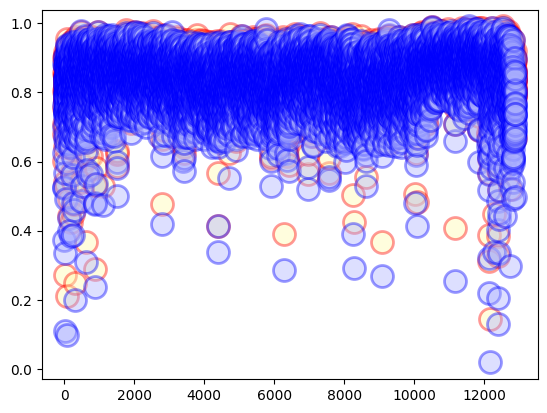

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import numpy

def coefficient_of_variation(data):

    mean=numpy.mean(data) #計算平均值

    std=numpy.std(data,ddof=0) #計算標準差

    cv=std/mean

    return cv


print('CV_1:',coefficient_of_variation(aaa))
print('CV_2:',coefficient_of_variation(aaa2))
      
      
#製作figure
fig = plt.figure()
# plt.xlabel("time")
# plt.ylabel("similarity")

#設定axes
ax = fig.add_subplot(1, 1, 1)

#設定x2, y2散佈圖的顏色，大小等等(紅色)
ax.scatter(bbb2, aaa2, s=250, alpha=0.4, linewidths=2, c='#FFFAAA', edgecolors='red')

#設定x1, y1散佈圖的顏色，大小等等(藍色)
ax.scatter(bbb, aaa, s=250, alpha=0.4, linewidths=2, c='#AAAFFF', edgecolors='blue')

plt.show()